In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Data Extraction and Initial Exploration

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv("/content/yahoo_stock.csv", parse_dates=['Date'])

print(data.info())

# Display the first few rows of the dataframe
data.head()
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB
None


In [3]:
data.isna().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


In [4]:
data.dtypes

,0
Date,datetime64[ns]
High,float64
Low,float64
Open,float64
Close,float64
Volume,float64
Adj Close,float64


In [5]:
data.describe()

,Date,High,Low,Open,Close,Volume,Adj Close
count,1825,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2018-05-23 00:00:00,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
min,2015-11-23 00:00:00,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2017-02-21 00:00:00,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2018-05-23 00:00:00,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2019-08-22 00:00:00,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,2020-11-20 00:00:00,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912
std,NaN,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177


In [6]:

from scipy.stats import skew, kurtosis



# Compute Skewness & Kurtosis
skewness = data[["High", "Low", "Open", "Close", "Volume", "Adj Close"]].apply(skew)
kurtosis_vals = data[["High", "Low", "Open", "Close", "Volume", "Adj Close"]].apply(kurtosis)

# Convert Data to Matrix
matrix = data[["High", "Low", "Open", "Close", "Volume", "Adj Close"]].values

# Create Lists from Data
price_list = data["Close"].tolist()
volume_list = data["Volume"].tolist()

# Create Vectors (NumPy arrays)
high_vector = data["High"].values
low_vector = data["Low"].values

# Create Factors (Categorical Data) - Example
price_categories = pd.qcut(data["Close"], q=3, labels=["Low", "Medium", "High"])
factor_data = list(price_categories)

# Print Outputs
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_vals)
print("\nMatrix:\n", matrix)
print("\nPrice List:\n", price_list)
print("\nVolume List:\n", volume_list)
print("\nHigh Vector:\n", high_vector)
print("\nLow Vector:\n", low_vector)
print("\nFactor Data (Price Categories):\n", factor_data)



Skewness:
 High         0.086025
Low          0.077505
Open         0.085045
Close        0.081801
Volume       1.805985
Adj Close    0.081801
dtype: float64

Kurtosis:
 High        -0.770083
Low         -0.754597
Open        -0.763571
Close       -0.766789
Volume       4.888192
Adj Close   -0.766789
dtype: float64

Matrix:
 [[2.09561011e+03 2.08138989e+03 2.08940991e+03 2.08659009e+03
  3.58798000e+09 2.08659009e+03]
 [2.09412012e+03 2.07029004e+03 2.08441992e+03 2.08913989e+03
  3.88493000e+09 2.08913989e+03]
 [2.09300000e+03 2.08630005e+03 2.08930005e+03 2.08887012e+03
  2.85294000e+09 2.08887012e+03]
 ...
 [3.61909009e+03 3.56733008e+03 3.61209009e+03 3.56779004e+03
  5.27445000e+09 3.56779004e+03]
 [3.58521997e+03 3.54384009e+03 3.55940991e+03 3.58187012e+03
  4.34720000e+09 3.58187012e+03]
 [3.58122998e+03 3.55685010e+03 3.57931006e+03 3.55754004e+03
  2.23666193e+09 3.55754004e+03]]

Price List:
 [2086.590087890625, 2089.139892578125, 2088.8701171875, 2088.8701171875, 2090.1101

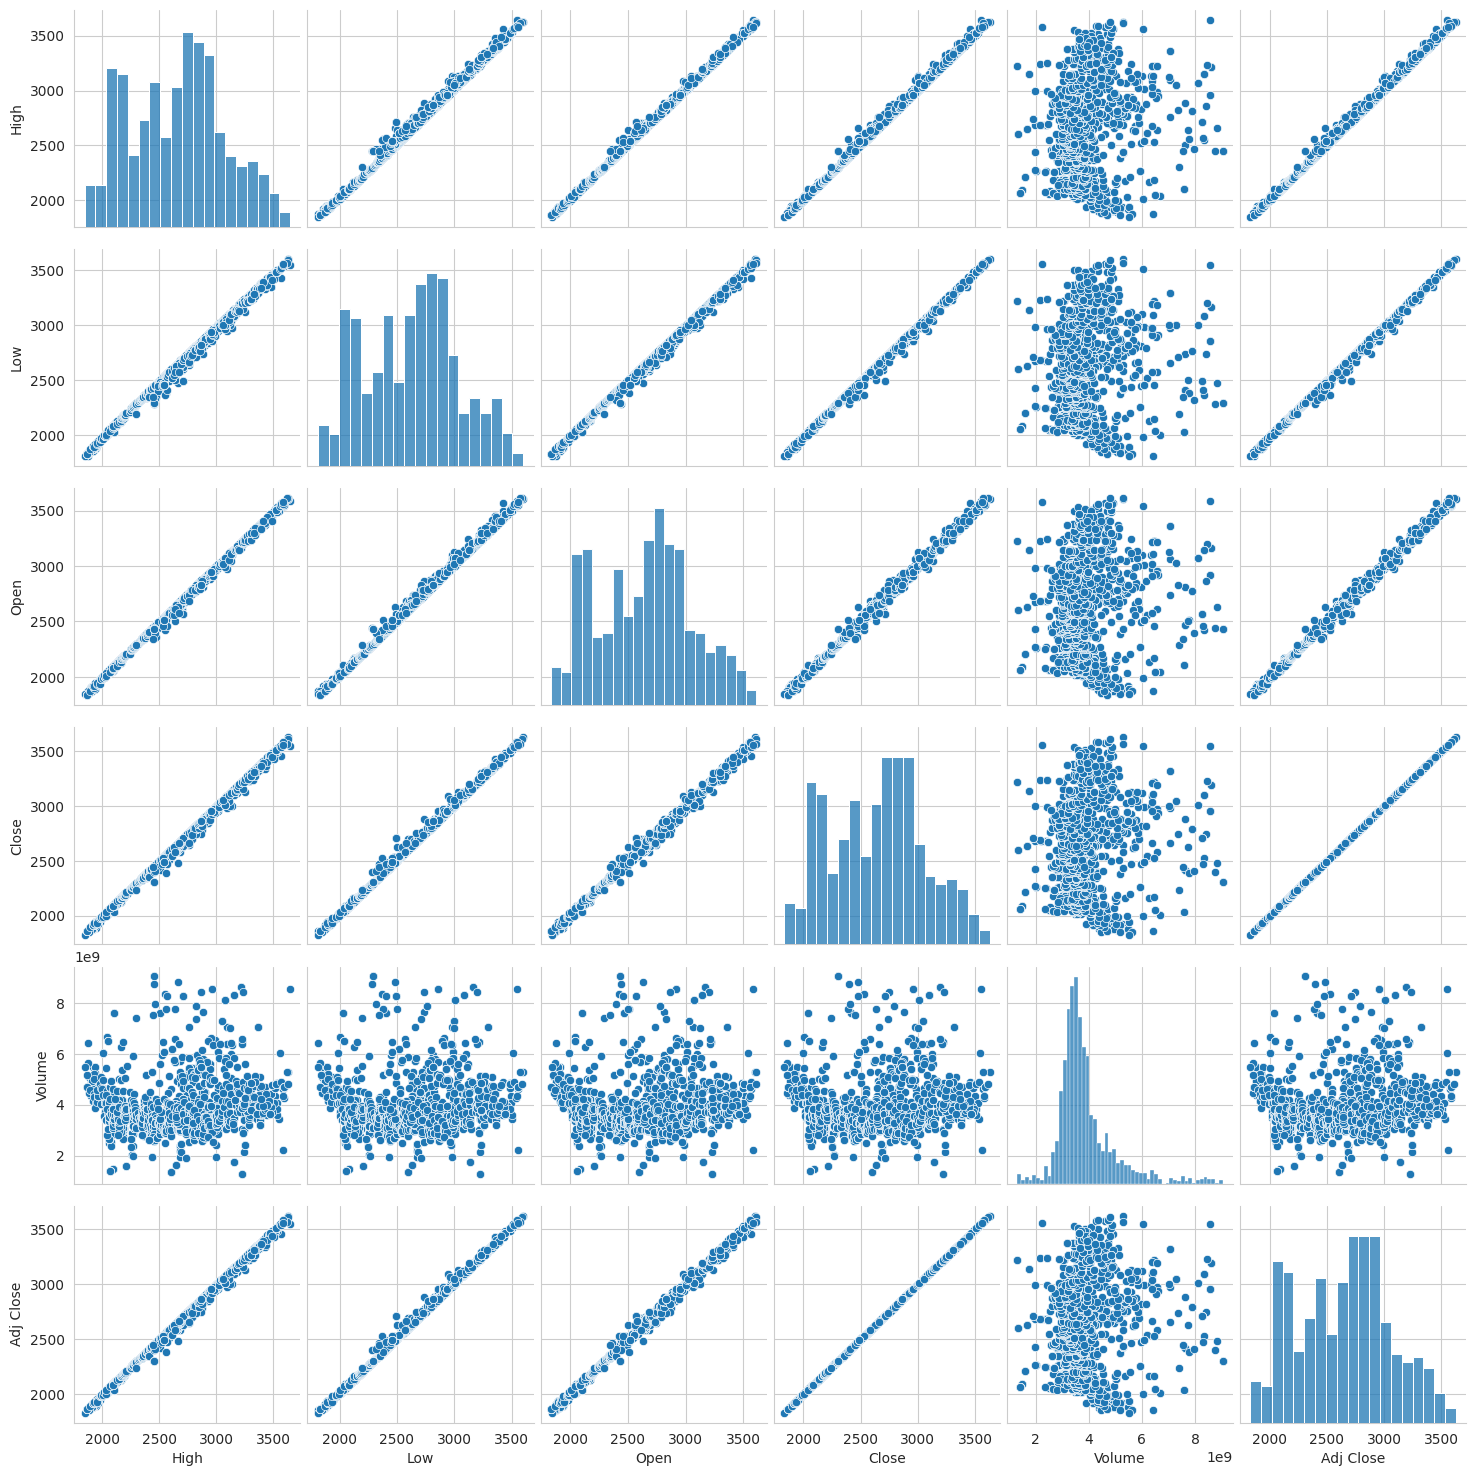

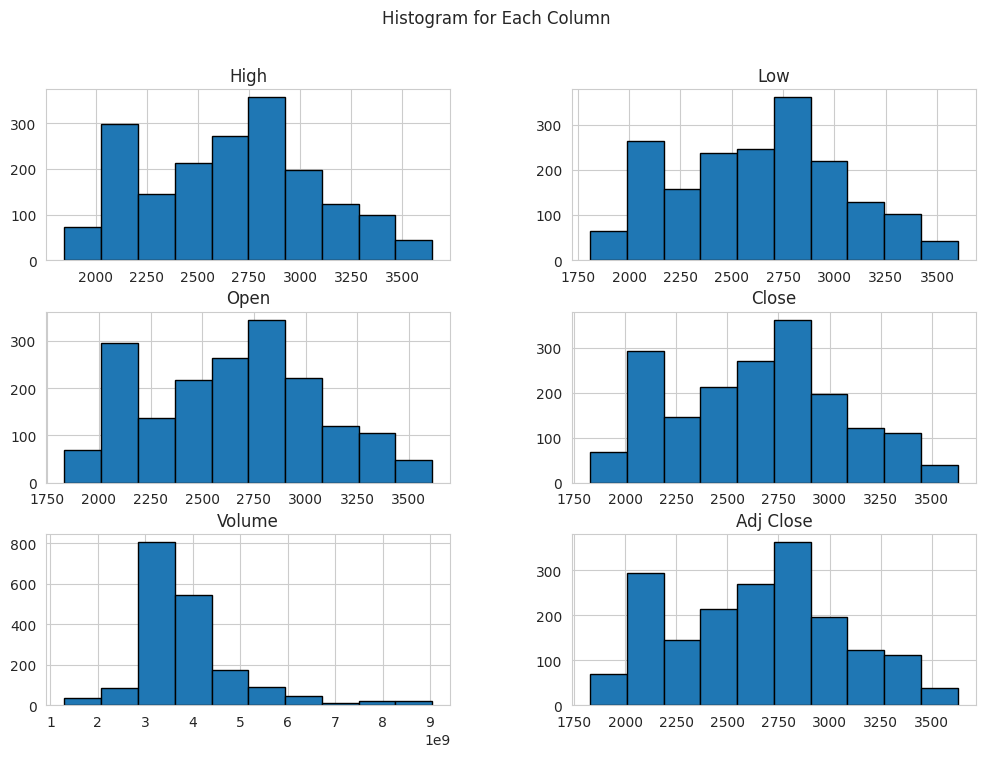

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop Date column (since it's not numeric)
numeric_data = data.drop(columns=["Date"])

# Set style
sns.set_style("whitegrid")

# Scatterplots (Pairplot)
sns.pairplot(numeric_data)
plt.show()

print()

# Histograms for each column
numeric_data.hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.suptitle("Histogram for Each Column")
plt.show()
print()

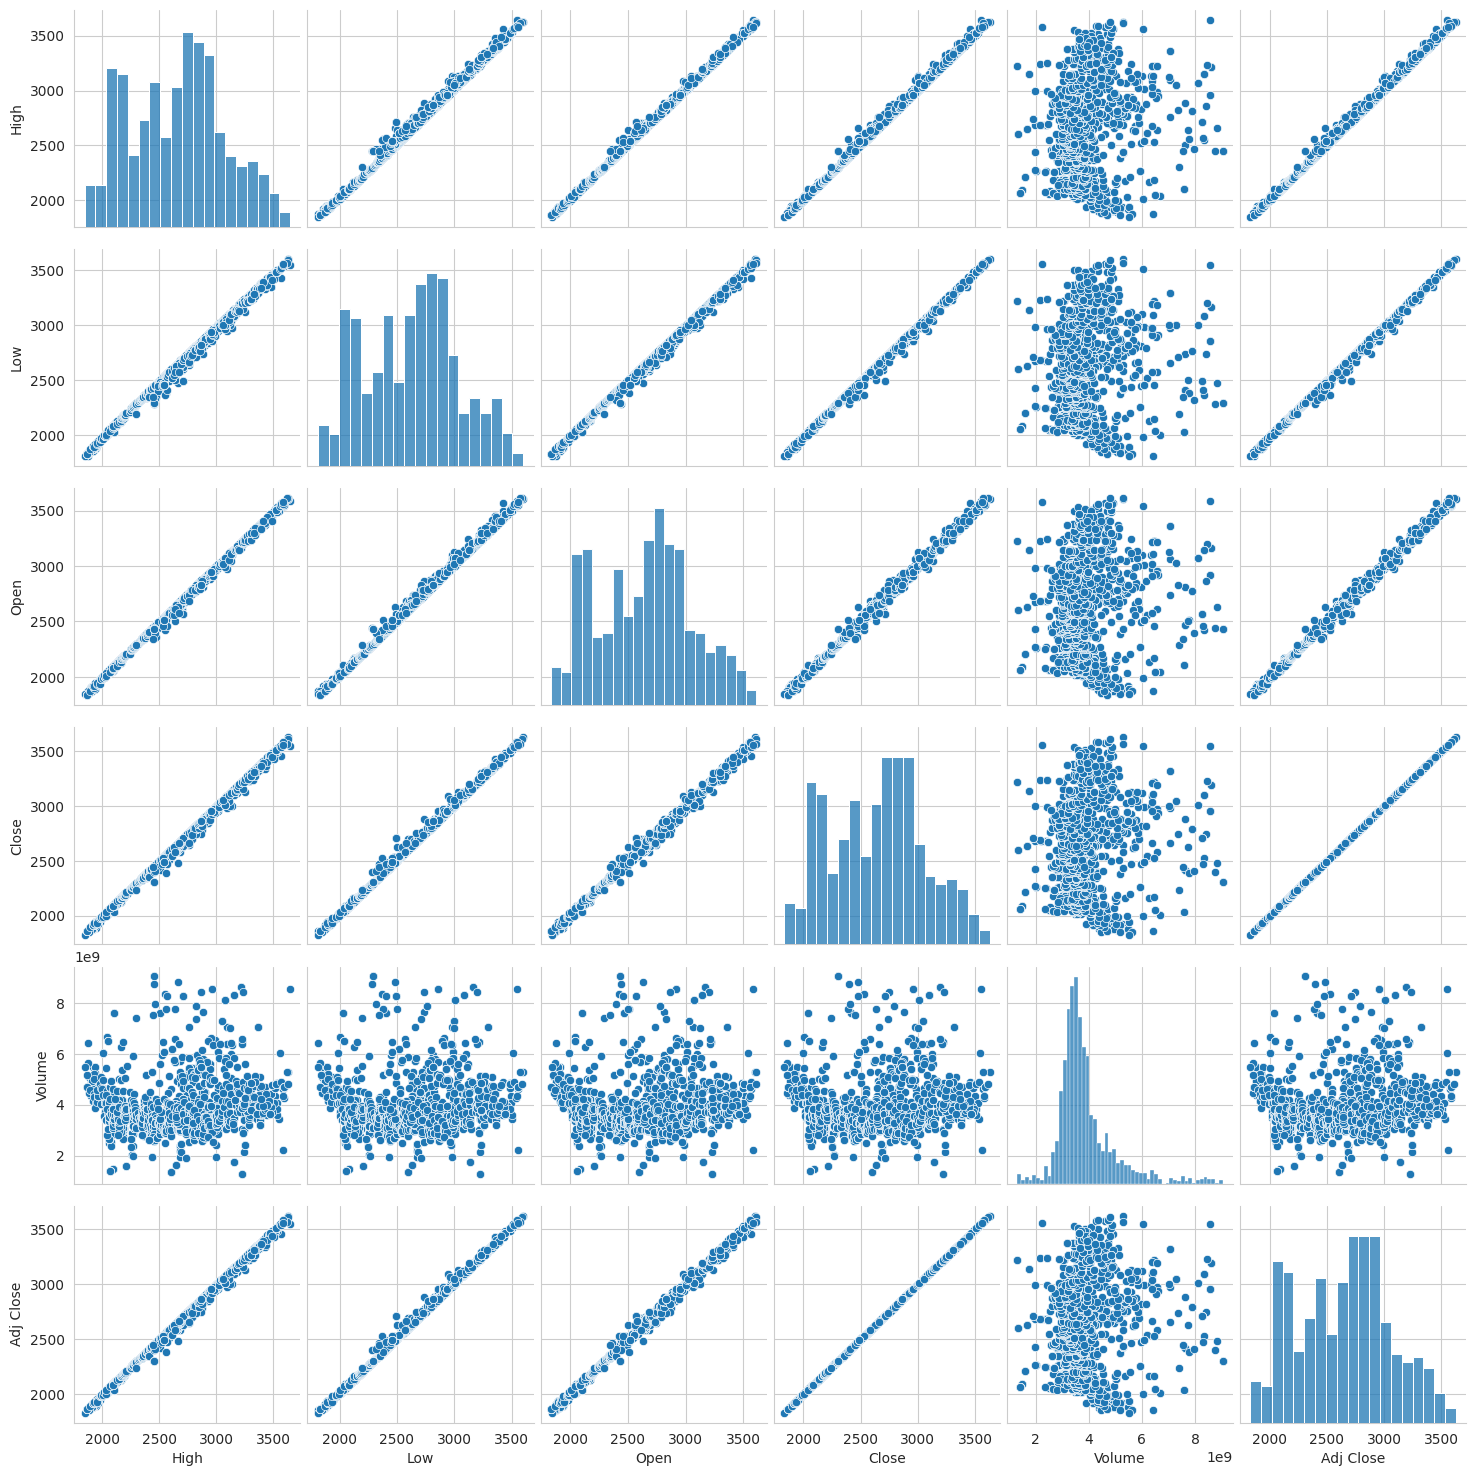

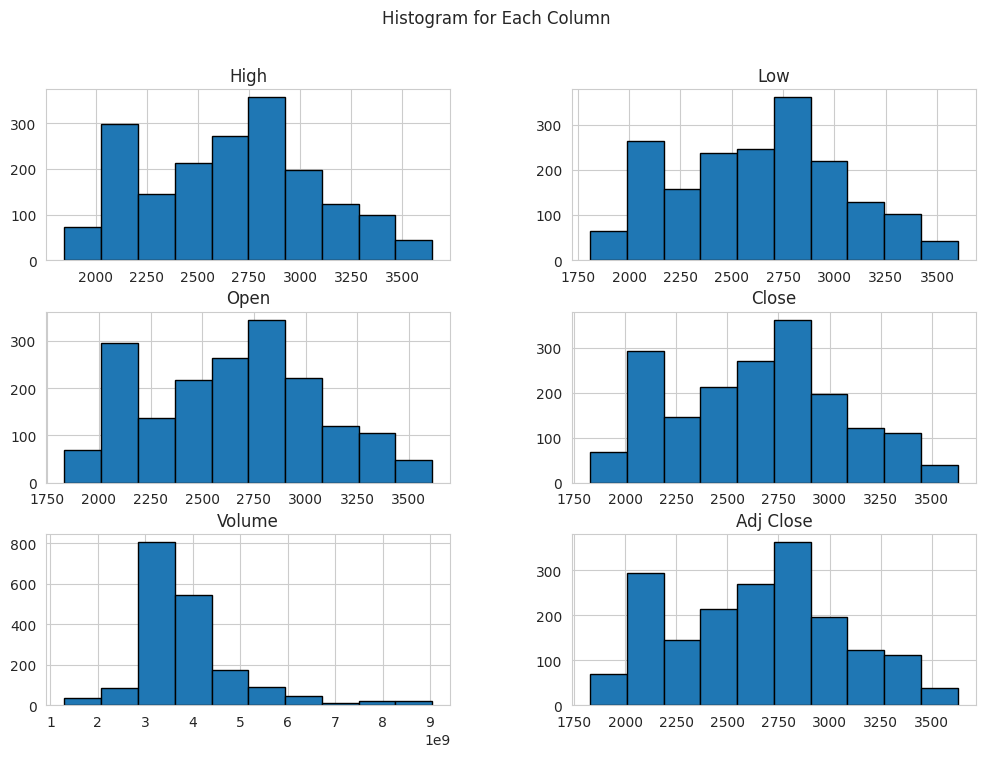

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Instead of dropping 'Date', select only numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Set style
sns.set_style("whitegrid")



# Scatterplots (Pairplot)
sns.pairplot(numeric_data)
plt.show()
print()

# Histograms for each column
numeric_data.hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.suptitle("Histogram for Each Column")
plt.show()
print()

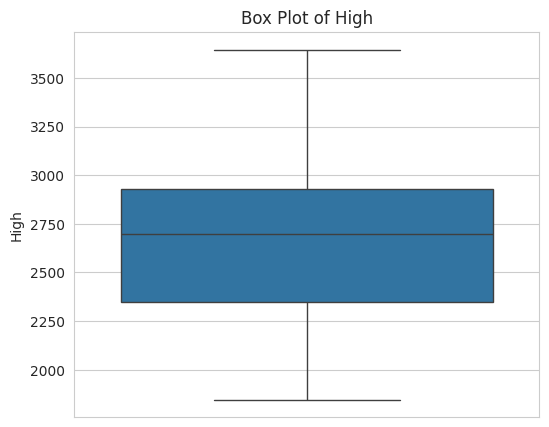

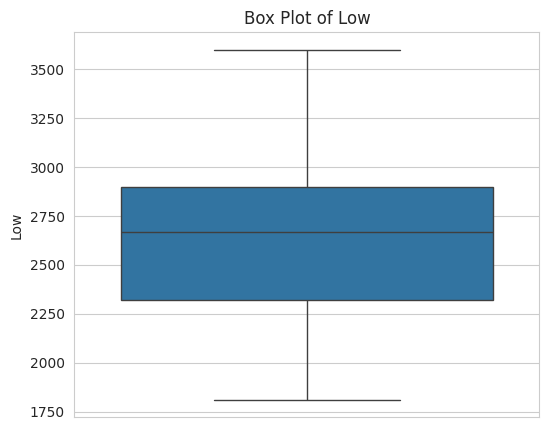

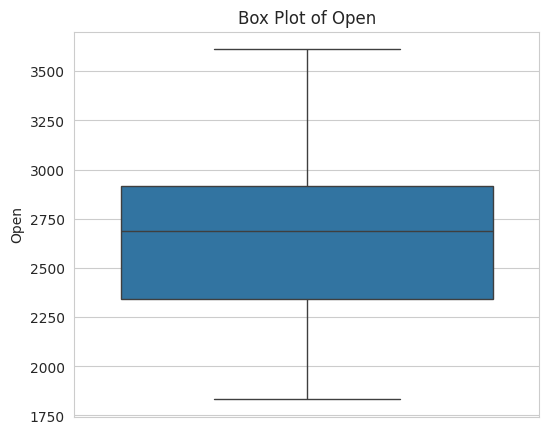

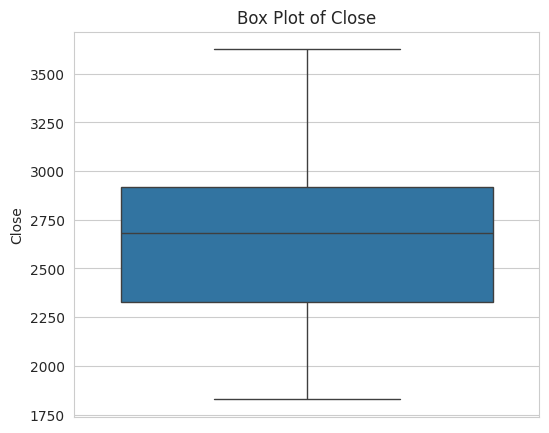

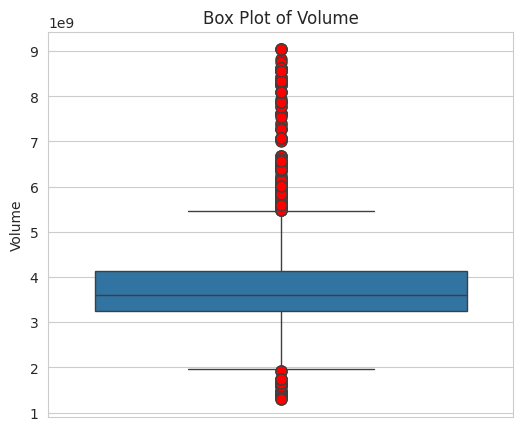

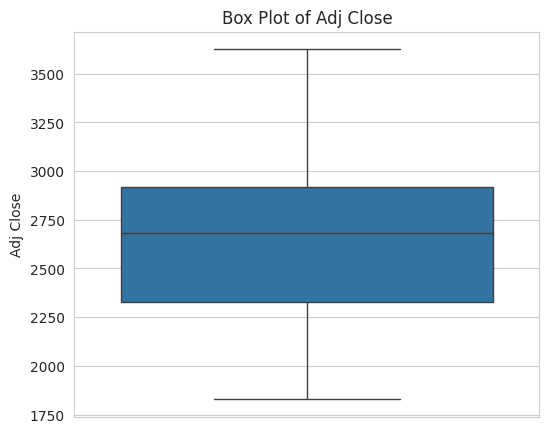

In [9]:
numeric_data = data.drop(columns=["Date"])

# Set style
sns.set_style("whitegrid")

# Draw separate box plots for each column with spacing and red-colored outliers
for column in numeric_data.columns:
    plt.figure(figsize=(6, 5))  # Adjust figure size for spacing
    ax = sns.boxplot(y=numeric_data[column], flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()
    print()

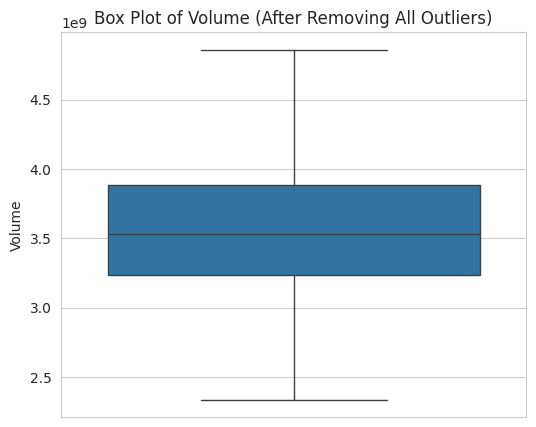

In [10]:
def remove_outliers_iqr(df, column):
    while True:
        Q1 = df[column].quantile(0.25)  # First quartile (25%)
        Q3 = df[column].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataset
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        # If no more outliers, break the loop
        if len(df_filtered) == len(df):
            break

        df = df_filtered  # Update df to new filtered dataset

    return df

# Remove outliers in Volume iteratively
data_cleaned = remove_outliers_iqr(data, "Volume")

# Plot box plot after removing outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=data_cleaned["Volume"], flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title("Box Plot of Volume (After Removing All Outliers)")
plt.ylabel("Volume")
plt.show()

In [11]:
a=data
a.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


## Import necessary Python packages

In [12]:
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

In [13]:

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for the time series
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Decompose the Close column
ts_data_close = data['Close']

# Perform seasonal decomposition on the Close column
decomposition = sm.tsa.seasonal_decompose(ts_data_close, model='additive', period=365)

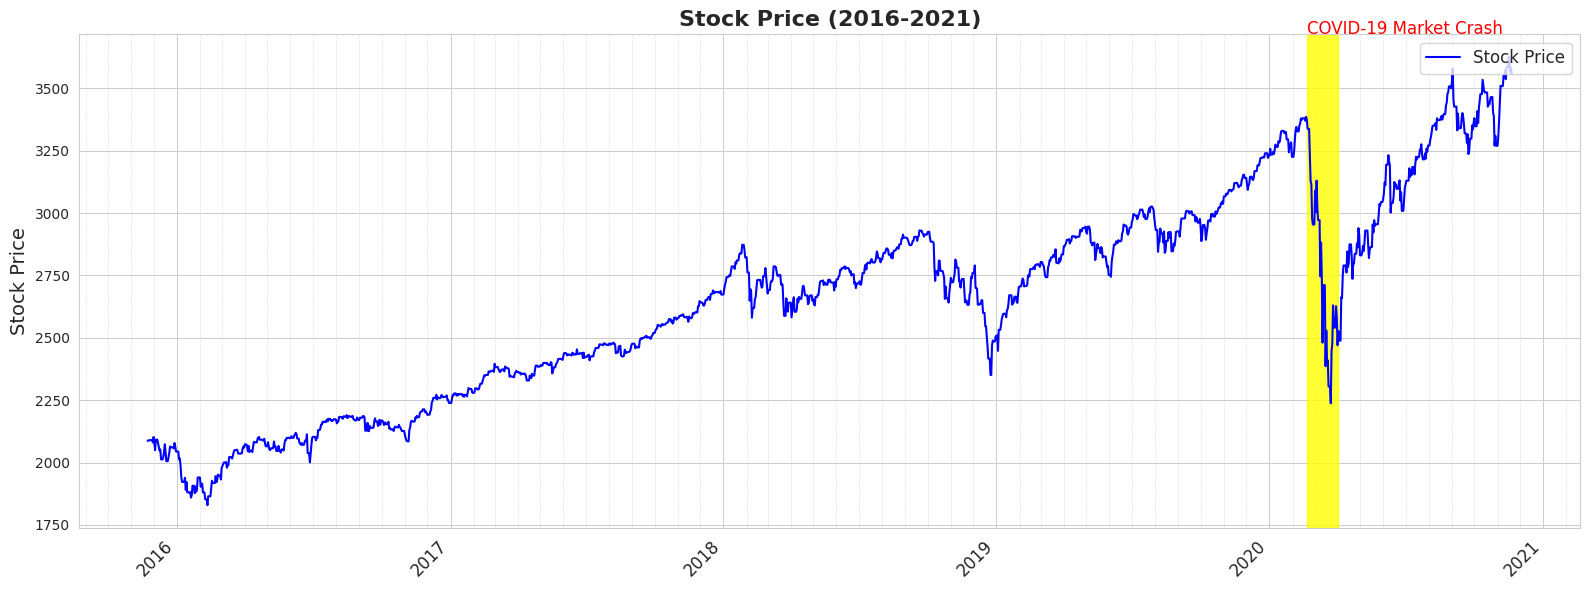

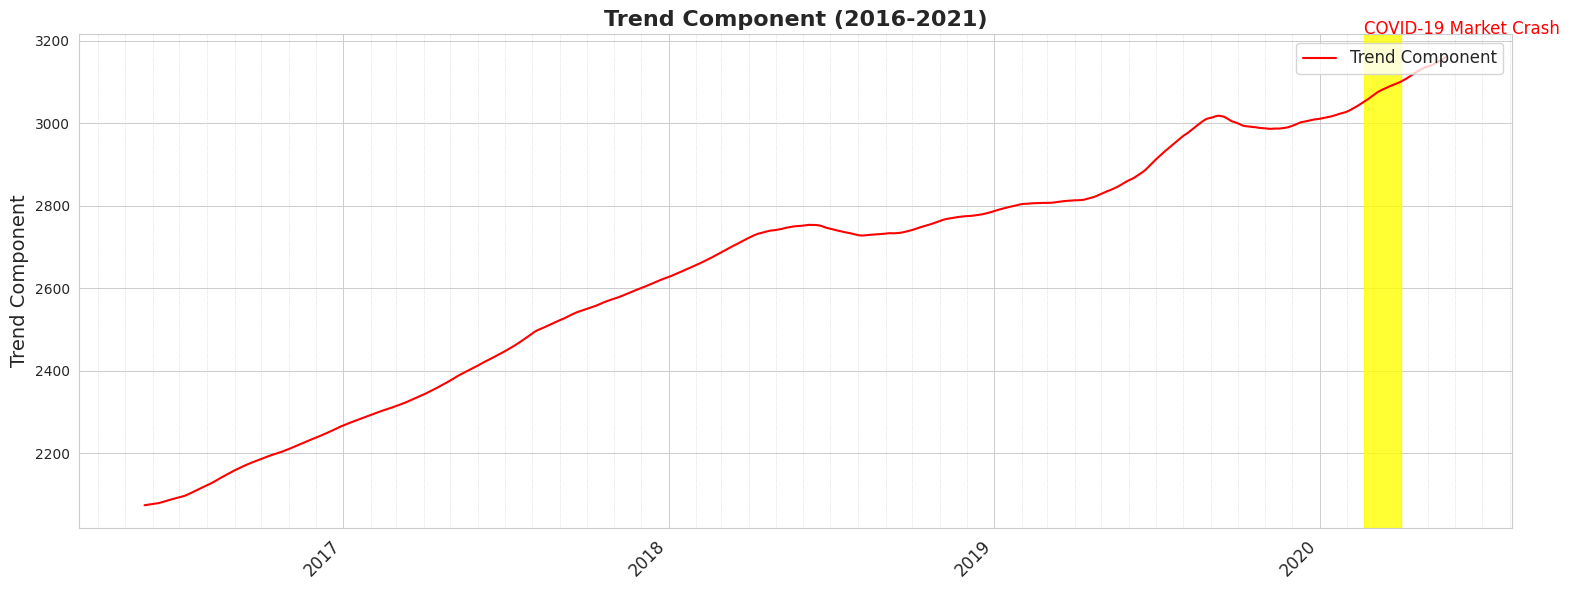

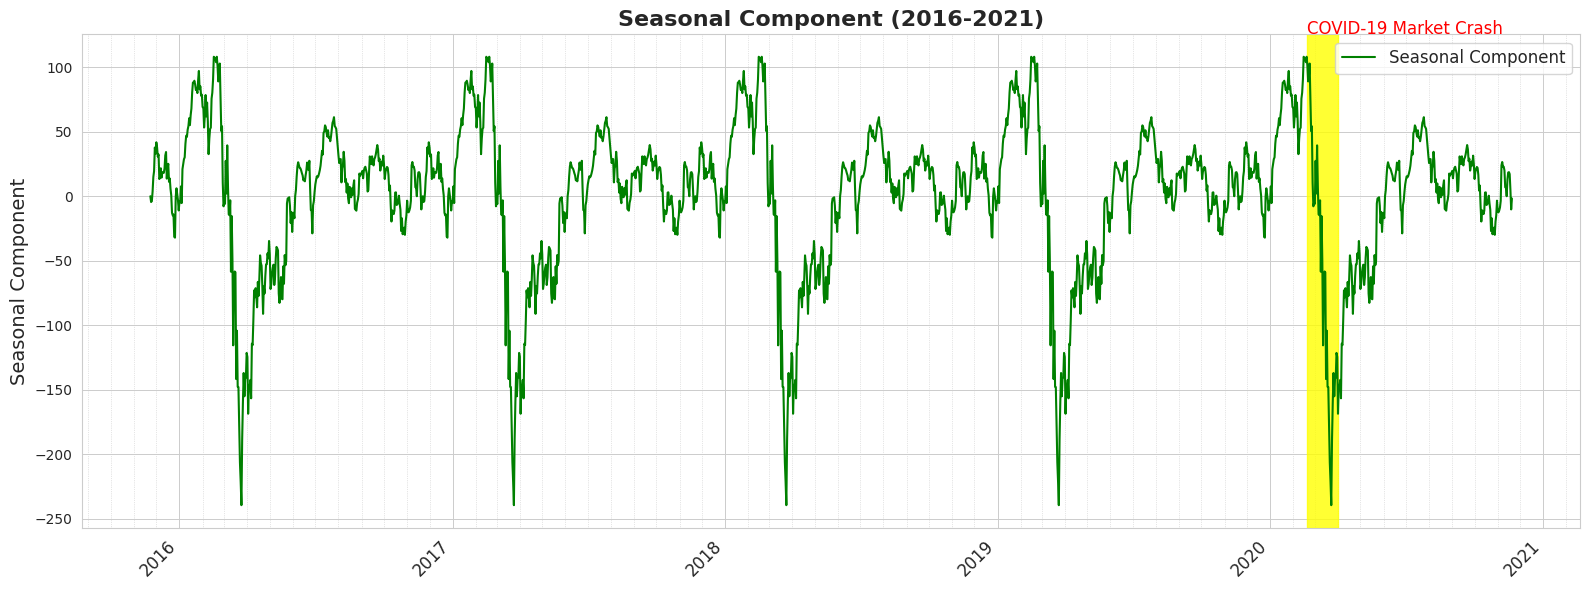

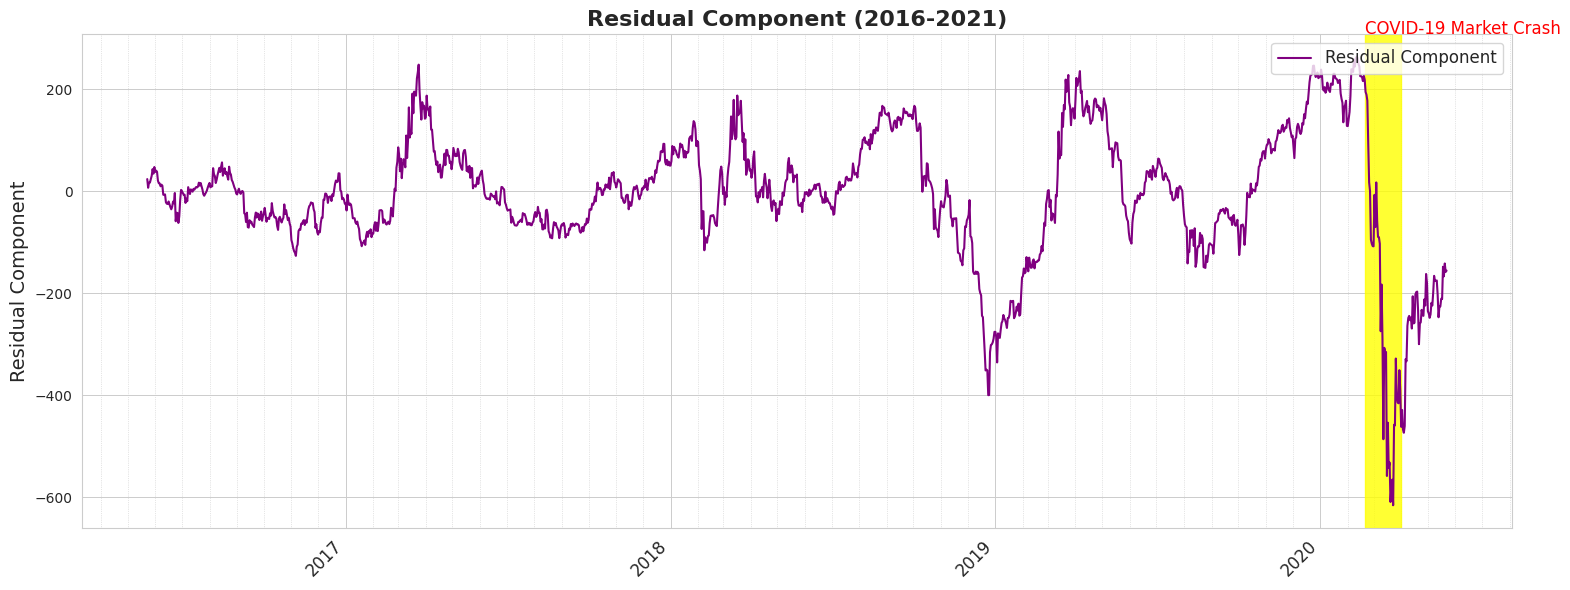

In [14]:
# Set the figure size globally
plt.rcParams['figure.figsize'] = [16, 6]

# Define the components and colors for individual plots
components = [
    ('Stock Price', ts_data_close, 'blue'),
    ('Trend Component', decomposition.trend, 'red'),
    ('Seasonal Component', decomposition.seasonal, 'green'),
    ('Residual Component', decomposition.resid, 'purple')
]

# Set up the date locators and formatters
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')

# Define the crash period
crash_start = pd.to_datetime('2020-02-20')
crash_end = pd.to_datetime('2020-04-01')

# Plot each component individually
for label, component, color in components:
    fig, ax = plt.subplots(figsize=(16, 6))

    # Plot the component
    ax.plot(component.index, component, color=color, label=label)
    ax.set_ylabel(label, fontsize=14)
    ax.legend(loc='upper right', fontsize=12)
    ax.grid(True, which='major', linestyle='-', linewidth=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

    # Set up the date locators and formatters
    ax.xaxis.set_major_locator(year)
    ax.xaxis.set_major_formatter(year_format)
    ax.xaxis.set_minor_locator(month)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

    # Highlight the 2020 crash
    ax.axvspan(crash_start, crash_end, color='yellow', alpha=0.8)
    ax.annotate('COVID-19 Market Crash', xy=(crash_start, ax.get_ylim()[1]),
                xycoords='data', fontsize=12, color='red')

    # Add a title for each individual plot
    plt.title(f'{label} (2016-2021)', fontsize=16, fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()


### Data values and trend decomposition plot

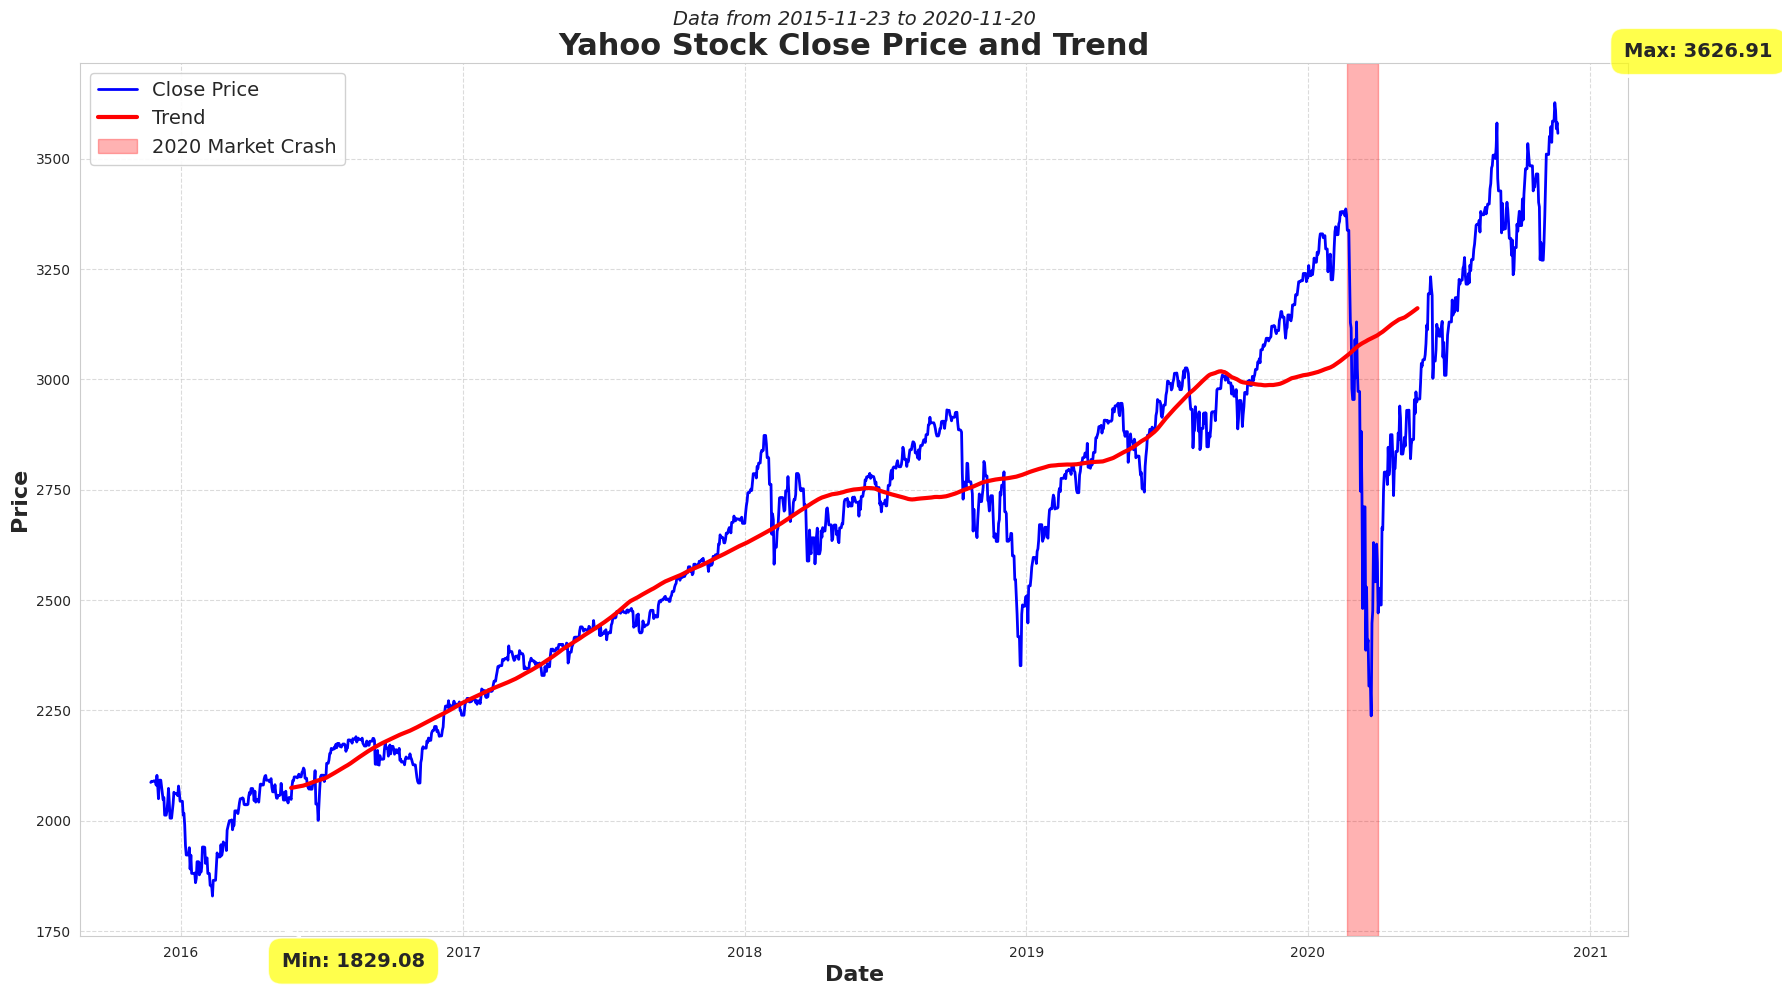

In [15]:
# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))  # Increased figure size for presentations
ax.grid(True, linestyle='--', alpha=0.7)

# Set up the date locators and formatters
year = mdates.YearLocator()
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
ax.xaxis.set_minor_locator(month)

# Plot the data with enhanced line width for visibility
ax.plot(data.index, data['Close'], c='blue', label='Close Price', linewidth=2)
ax.plot(decomposition.trend.index, decomposition.trend, c='red', label='Trend', linewidth=3)

# Highlight the 2020 crash with clearer emphasis
crash_start = pd.to_datetime('2020-02-20')
crash_end = pd.to_datetime('2020-04-01')
ax.axvspan(crash_start, crash_end, color='red', alpha=0.3, label='2020 Market Crash')

# Add labels and title with increased size and bold formatting
ax.set_xlabel('Date', fontsize=16, fontweight='bold')
ax.set_ylabel('Price', fontsize=16, fontweight='bold')
ax.set_title('Yahoo Stock Close Price and Trend', fontsize=22, fontweight='bold')

# Add a subtitle with data date range
ax.text(0.5, 1.05, f'Data from {data.index.min().date()} to {data.index.max().date()}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=14, style='italic')

# Enhance the legend with larger font size and bold style
ax.legend(loc='upper left', frameon=True, framealpha=0.9, fontsize=14, title_fontsize='13')

# Annotate significant points (max and min) with larger text, bold, and arrows
max_point = data['Close'].idxmax()
min_point = data['Close'].idxmin()

ax.annotate(f'Max: {data.loc[max_point, "Close"]:.2f}',
            xy=(max_point, data.loc[max_point, 'Close']),
            xytext=(50, 30), textcoords='offset points',
            ha='left', va='bottom',
            fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.7', fc='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=2, connectionstyle='arc3,rad=0'))

ax.annotate(f'Min: {data.loc[min_point, "Close"]:.2f}',
            xy=(min_point, data.loc[min_point, 'Close']),
            xytext=(50, -40), textcoords='offset points',
            ha='left', va='top',
            fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.7', fc='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=2, connectionstyle='arc3,rad=0'))

# Adjust layout and display
plt.tight_layout()
plt.show()


## Data Normalization and Standardization

In [16]:
# from pandas import Series
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# # Prepare data for normalization
# values = data['Close'].values
# values = values.reshape((len(values), 1))

# # Train the normalization
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(values)

# # Print the min and max values used for normalization
# print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# # Normalize the dataset and print the first 5 rows
# normalized = scaler.transform(values)
# print("First 5 rows of normalized data:")
# for i in range(5):
#     print(normalized[i])

# # Inverse transform and print the first 5 rows
# inversed = scaler.inverse_transform(normalized)
# print("\nFirst 5 rows after inverse transformation:")
# for i in range(5):
#     print(inversed[i])

# # Plot the normalized data
# plt.figure(figsize=(18, 8))  # Increase figure size for better visibility

# # Plot normalized data with labels and grid
# plt.plot(data.index, normalized, color='blue', linewidth=2)
# plt.title('Normalized Yahoo Stock Close Prices', fontsize=22, fontweight='bold')
# plt.xlabel('Date', fontsize=16, fontweight='bold')
# plt.ylabel('Normalized Price', fontsize=16, fontweight='bold')

# # Rotate and format the x-axis labels for better readability
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(fontsize=12)

# # Add grid for better visualization
# plt.grid(True, linestyle='--', alpha=0.7)

# # Adjust layout for presentation
# plt.tight_layout()

# # Show the plot
# plt.show()


In [17]:
import datetime as dt
import os

from collections import UserDict
from glob import glob
import pandas as pd
import numpy as np
from IPython.display import Image

# Setting options for pandas and numpy
pd.options.display.float_format = '{:.2f}'.format  # Set pandas float format
np.set_printoptions(precision=2)  # Set numpy precision for printed floats


# Display the first few rows of the dataframe
data.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.61,2081.39,2089.41,2086.59,3587980000.00,2086.59
2015-11-24,2094.12,2070.29,2084.42,2089.14,3884930000.00,2089.14
2015-11-25,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-26,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-27,2093.29,2084.13,2088.82,2090.11,1466840000.00,2090.11


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

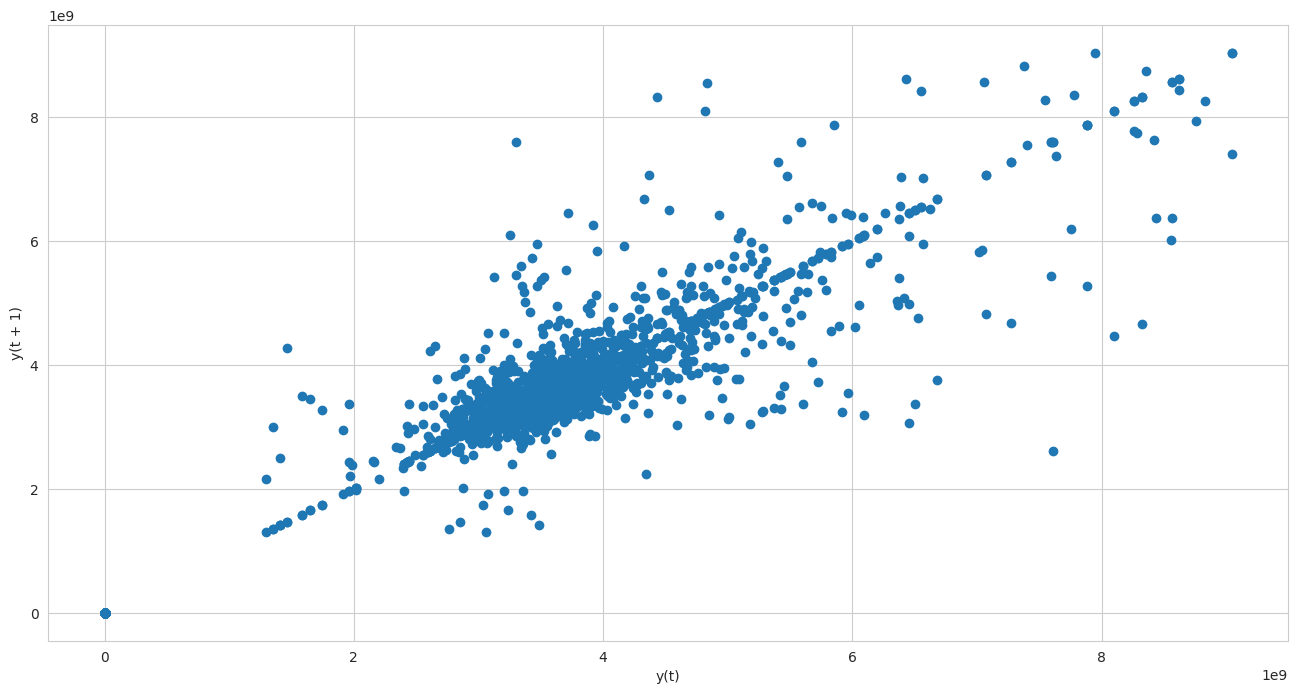

In [18]:
# Import lag_plot function
from pandas.plotting import lag_plot
plt.figure(figsize=(16, 8))
# Pass the lag argument and plot the values.
# When lag=1 the plot is essentially data[:-1] vs. data[1:]
# Plot our ts_data_load set
lag_plot(data)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

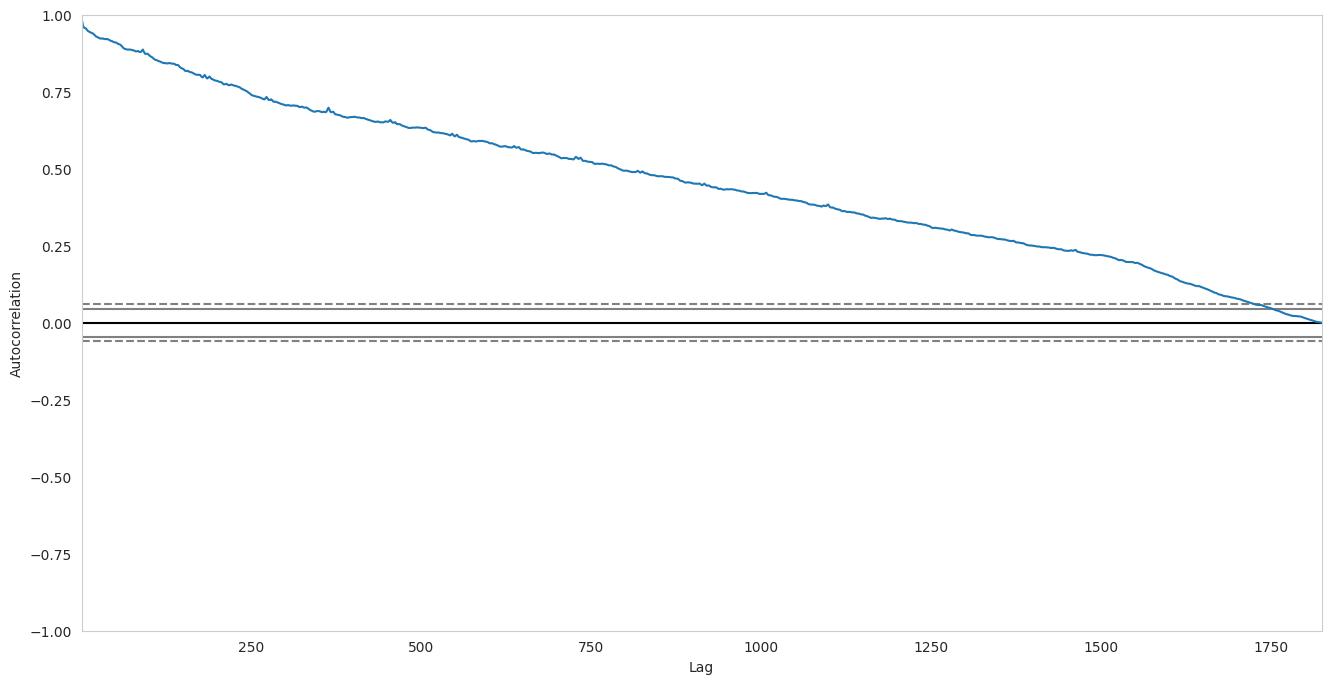

In [19]:
# Import autocorrelation_plot function
from pandas.plotting import autocorrelation_plot
fig = plt.subplots(figsize=(16, 8))  # Create an axes object with specific size
# Pass the autocorrelation argument and plot the values
autocorrelation_plot(data)

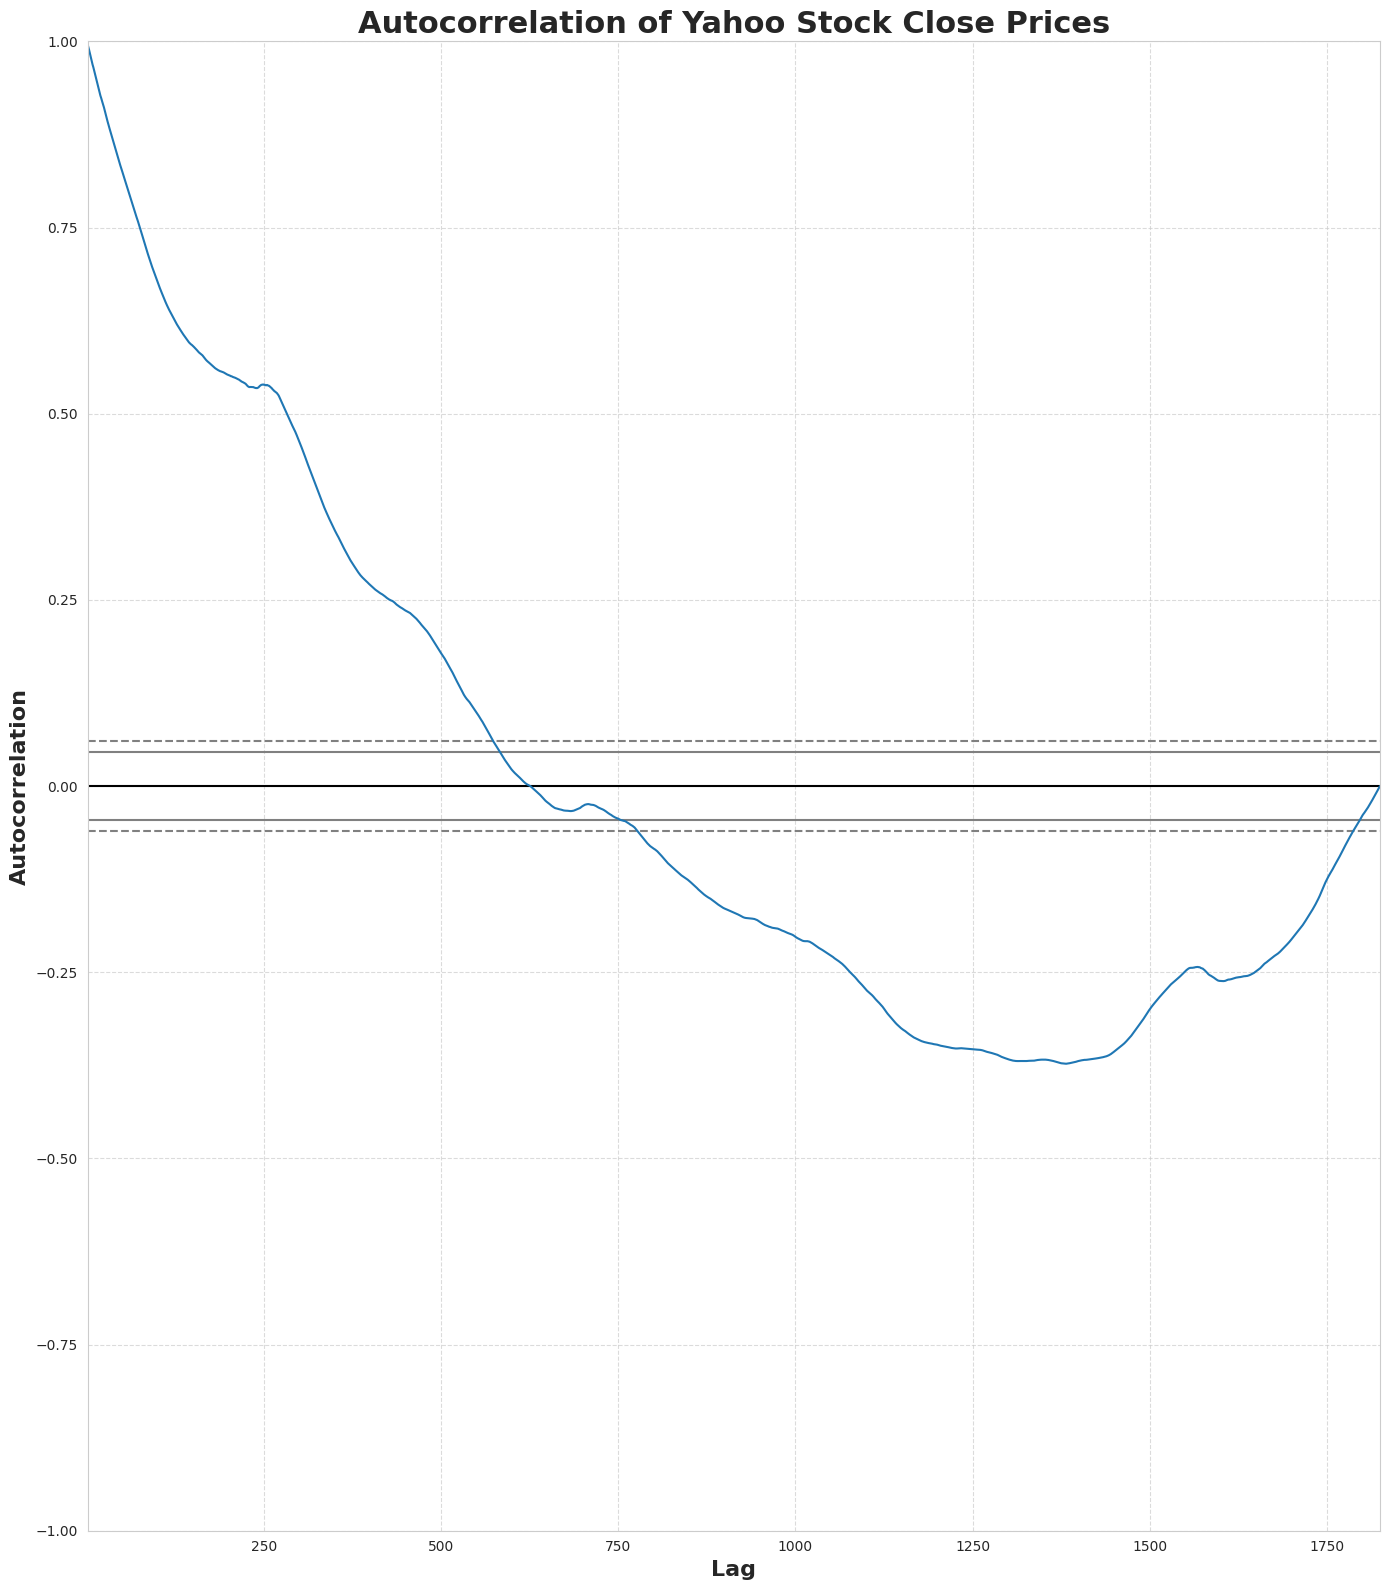

In [20]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Create the plot with an increased figure size
plt.figure(figsize=(14, 16))  # Increased size for presentation visibility

# Plot the autocorrelation of the 'Close' column
autocorrelation_plot(data['Close'])

# Add a title and axis labels with enhanced font sizes and bold text
plt.title('Autocorrelation of Yahoo Stock Close Prices', fontsize=22, fontweight='bold')
plt.xlabel('Lag', fontsize=16, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=16, fontweight='bold')

# Add gridlines for better visual clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout to ensure the plot looks well-aligned
plt.tight_layout()

# Show the plot
plt.show()


#### The slow decay suggests the series is likely non-stationary.

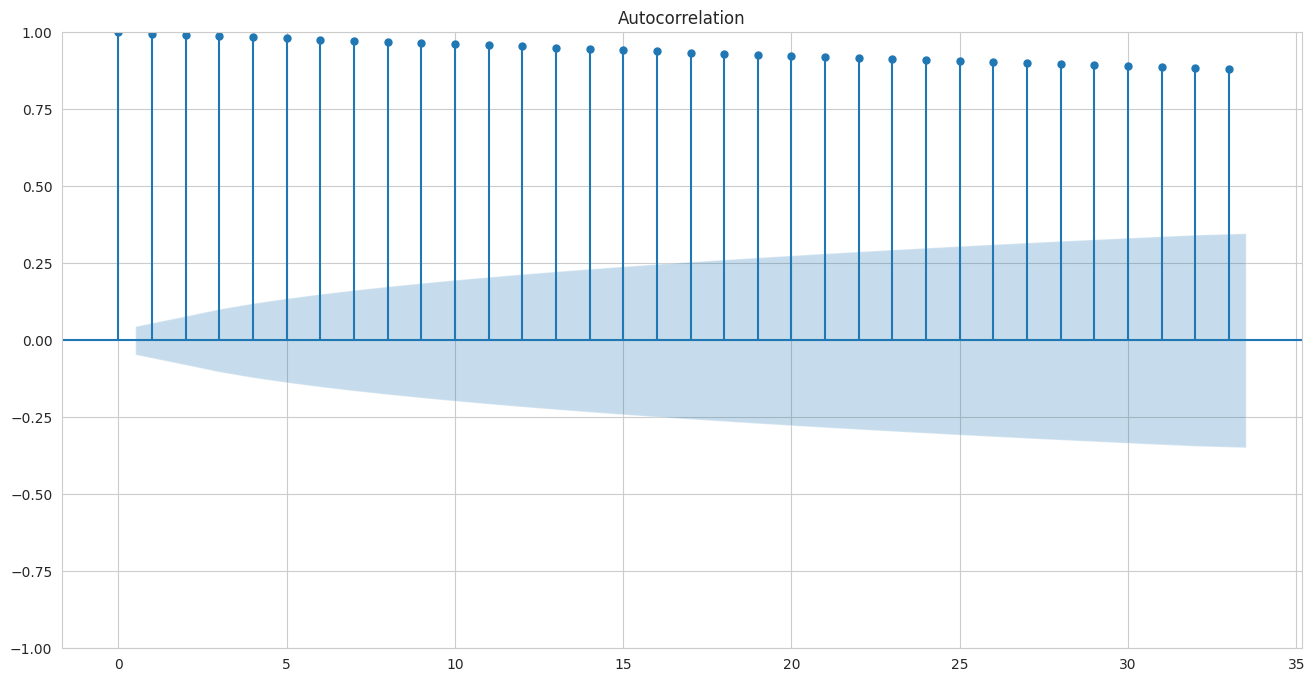

In [21]:
# Import plot_acf() function
import matplotlib.pyplot as plt  # Import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load_subset
fig, ax = plt.subplots(figsize=(16, 8))  # Create an axes object with specific size

plot_acf(data['Close'], ax=ax )

plt.show()


######
Analysis:

The ACF plot shows very high autocorrelation at low lags, slowly decreasing over time.

All autocorrelations are positive and significant (above the confidence interval).

The confidence interval (blue shaded area) widens as the lag increases.

Insights:

Confirms the strong temporal dependence in the series.

The series is likely non-stationary due to the slow decay of autocorrelations.

There's no clear seasonality visible in this ACF plot.

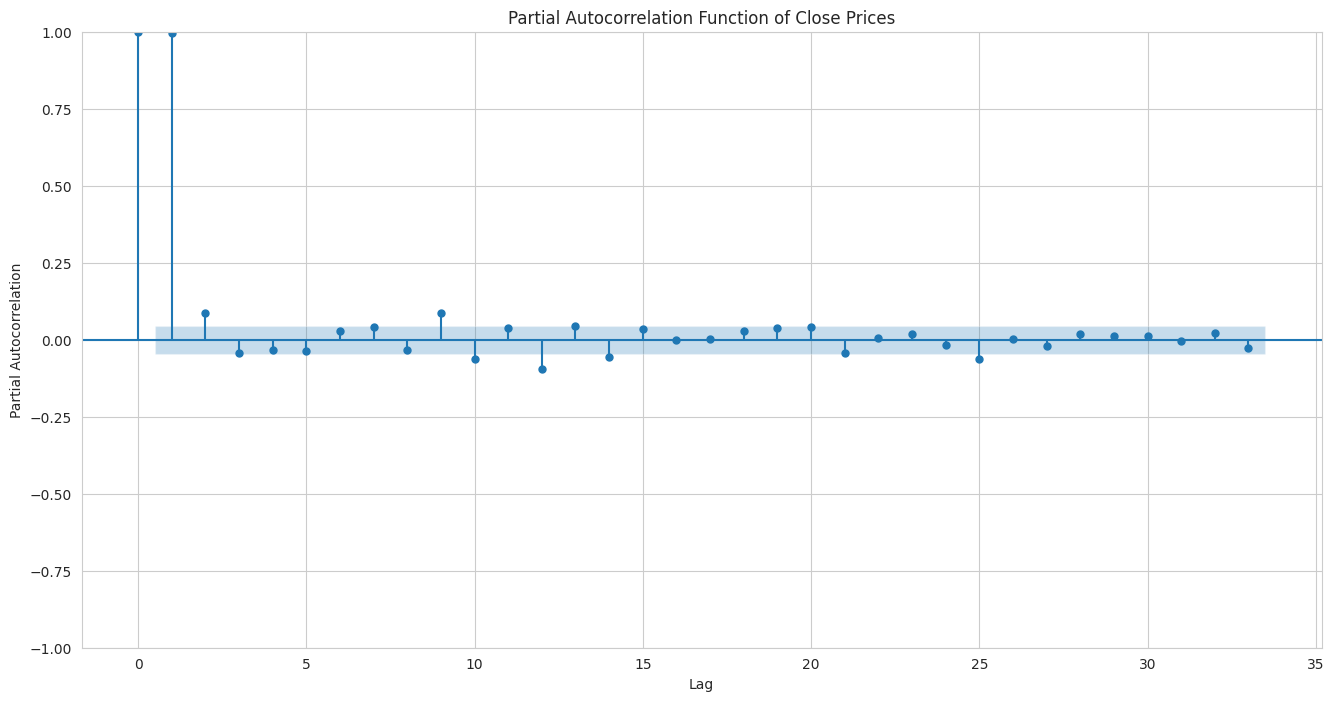

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Create a figure with a specific size (width, height) in inches
fig, ax = plt.subplots(figsize=(16, 8))  # Create an axes object with specific size

# Plot the acf function on the data['Close'] subset on the created axes
plot_pacf(data['Close'], ax=ax)
ax.set_title('Partial Autocorrelation Function of Close Prices')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
# Show the plot
plt.show()


### The strong lag 1 partial autocorrelation suggests that an AR(1) (Autoregressive model of order 1) might be appropriate for this time series.

### There are no obvious cyclical or seasonal patterns visible in the PACF plot.

### This PACF plot suggests that a simple model like ARIMA(1,d,q) might be suitable. Might also try ARIMA(1,d,1)

### Stationarity: The rapid decay in partial autocorrelations after lag 1 is a good sign, but doesn't guarantee stationarity. You should still perform formal stationarity tests.

#### AUTOREG MODEL RESULTS

In [23]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
# Apply AutoReg model
model = AutoReg(data['Close'], 1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(1)   Log Likelihood               -8626.385
Method:               Conditional MLE   S.D. of innovations             27.397
Date:                Thu, 27 Mar 2025   AIC                          17258.770
Time:                        04:14:31   BIC                          17275.296
Sample:                    11-24-2015   HQIC                         17264.866
                         - 11-20-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5653      4.224      1.081      0.280      -3.714      12.845
Close.L1       0.9986      0.002    633.156      0.000       0.995       1.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0014           +0.0000j            1.0014            0.0000
-----------------------------------------------------------------------------
"""

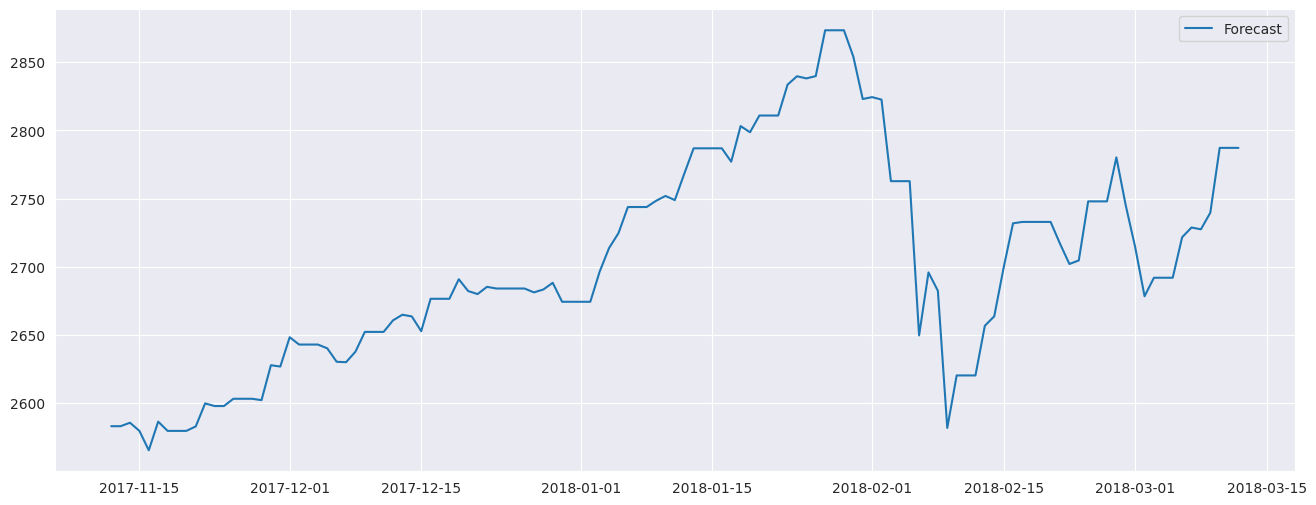

In [24]:
# Define figure style, plot package and default figure size
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
# Use plot_predict and visualize forecasts
figure = results.plot_predict(720, 840)

## Test the Forecasting capability of the Autoregression()

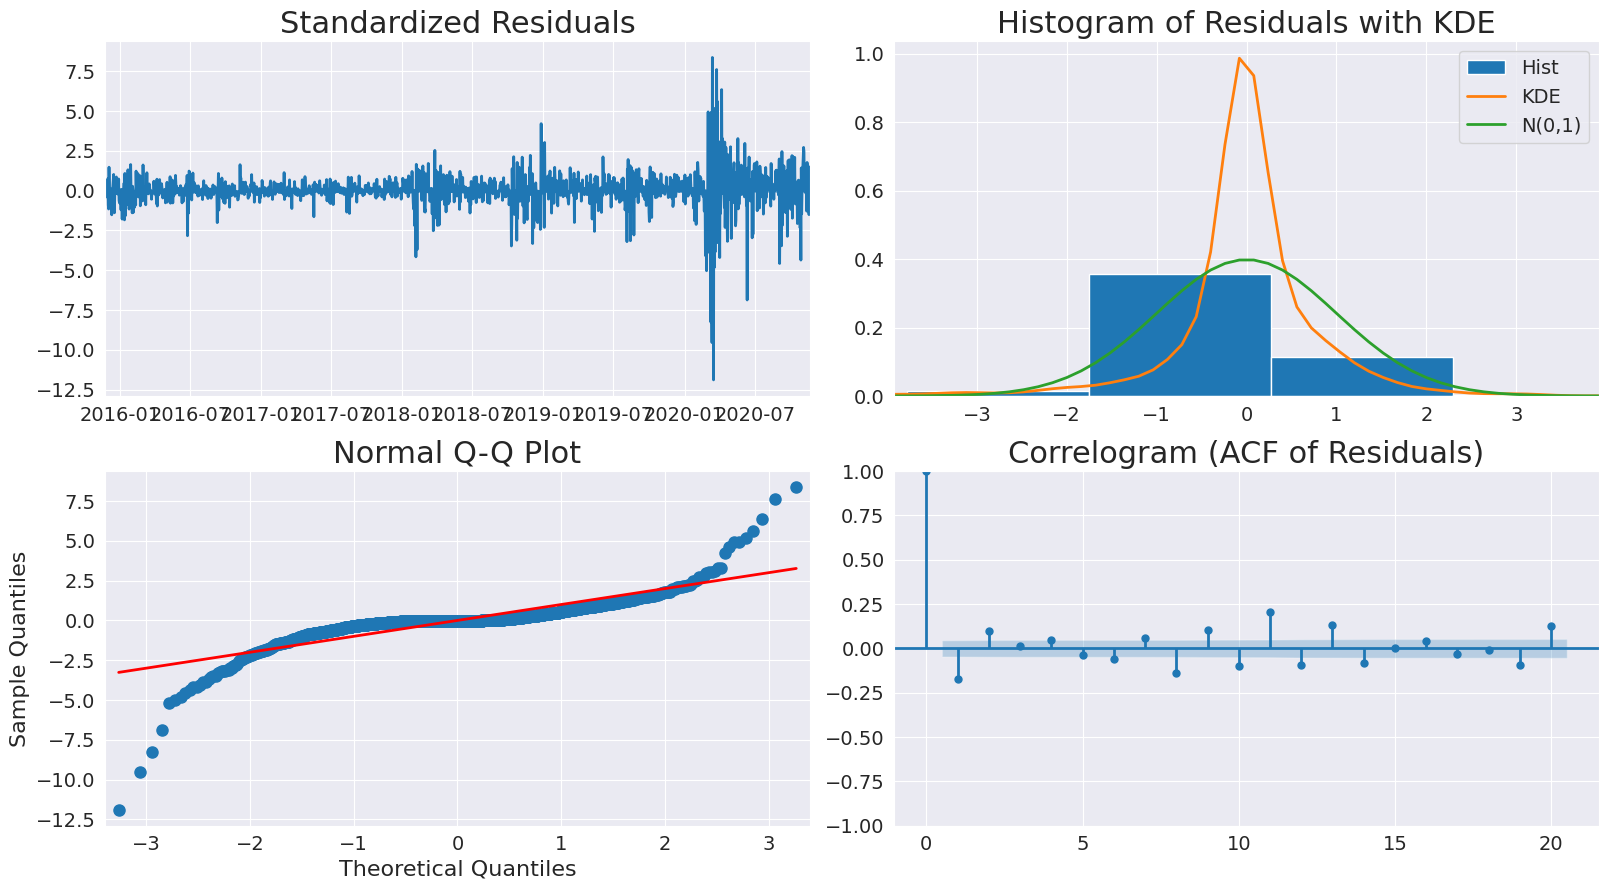

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure style and default figure size
sns.set_style("darkgrid")

# Set larger font sizes and line width for clarity in presentations
plt.rcParams.update({
    'figure.figsize': (16, 9),
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2,
    'lines.markersize': 8
})

# Create the diagnostic plot
fig = plt.figure(figsize=(16, 9))
fig = results.plot_diagnostics(fig=fig, lags=20)

# Add more informative titles to each subplot
fig.axes[0].set_title('Standardized Residuals', fontsize=22)
fig.axes[1].set_title('Histogram of Residuals with KDE', fontsize=22)
fig.axes[2].set_title('Normal Q-Q Plot', fontsize=22)
fig.axes[3].set_title('Correlogram (ACF of Residuals)', fontsize=22)

# Adjust the layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show()


####  1. **Residuals are evenly distributed:** The model's errors are random and unbiased.
####  2. **Residuals are approximately normal:** The distribution is bell-shaped, but there might be a few outliers.
####  3. **Q-Q plot shows some deviations:** The residuals might have outliers.
####  4. **No significant autocorrelation:** The residuals are not correlated with each other.


In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
train_start_dt = data.index[0]
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1460, 1)
Test data shape:  (365, 1)


In [27]:
# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5  # You can adjust this value
print('Forecasting horizon:', HORIZON, 'days')

Forecasting horizon: 5 days


In [28]:
# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Make predictions on the test data
training_window = 60  # You can adjust this value
history = list(train['Close'])
history = history[-training_window:]
predictions = []

for t in range(len(test_shifted)):
    model = AutoReg(history, lags=5)  # You can adjust the number of lags
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]
    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

Predicted 1/361
Predicted 101/361
Predicted 201/361
Predicted 301/361


RMSE: 58.14420711680526


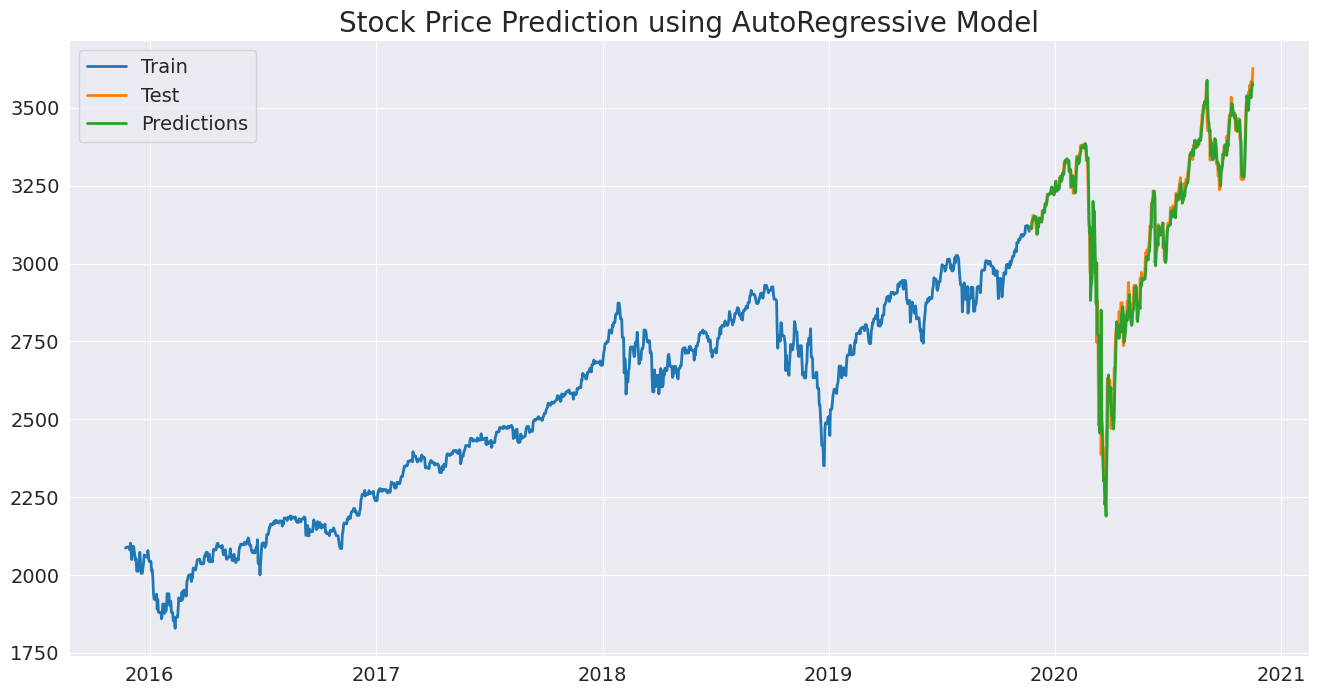

In [29]:
# Reshape predictions and inverse transform
predictions = np.array(predictions)[:, 0]  # Take only the first prediction for each step
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the test data
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction using AutoRegressive Model')
plt.show()

In [30]:
# # Reshape predictions and inverse transform
# predictions = np.array(predictions)[:, 0]  # Take only the first prediction for each step
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# # Inverse transform the test data
# test_values = scaler.inverse_transform(test[['Close']])

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
# print(f'RMSE: {rmse}')

# # Plot the results with transparency for the Predictions line
# plt.figure(figsize=(16,8))
# plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
# plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
# plt.plot(test.index[:len(predictions)], predictions, label='Predictions', alpha=0.6)  # Adjust alpha for transparency
# plt.legend()
# plt.title('Stock Price Prediction using AutoRegressive Model')
# plt.show()


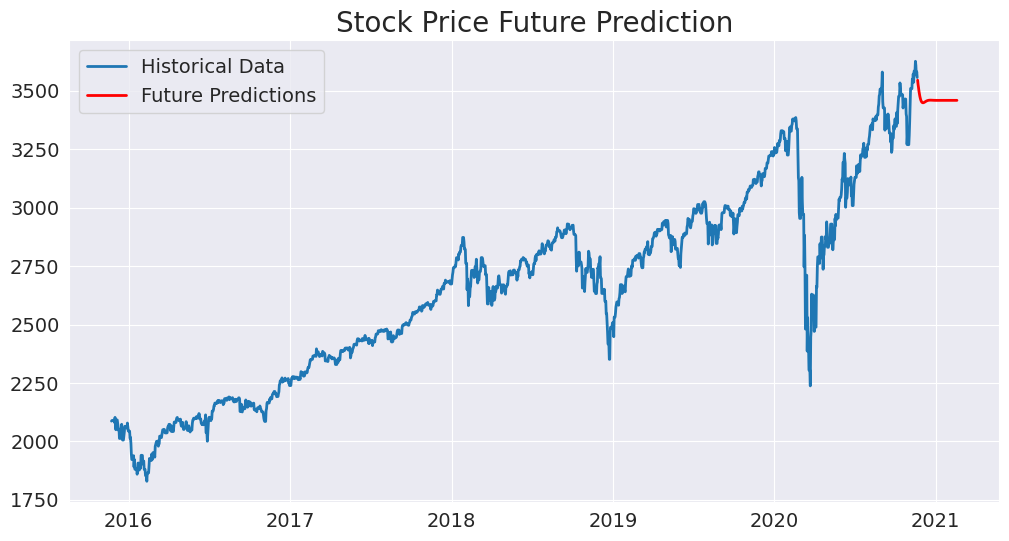

In [31]:
# Make future predictions
future_history = list(train['Close']) + list(test['Close'])
future_history = future_history[-training_window:]
future_model = AutoReg(future_history, lags=5)
future_model_fit = future_model.fit()
future_predictions = future_model_fit.forecast(steps=90)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction')
plt.show()

#### The analysis of the model's performance indicates the following:

1. **Model Performance**:
   - The RMSE of 58.14 is low compared to the stock price range of 2000 to 3500, suggesting a small prediction error (about 1.7% to 2.9%).
   - The model captures the overall trend well, closely following the actual data, though it lags slightly behind rapid changes.

2. **Future Predictions**:
   - The model predicts a flat trend in the future, typical for AutoRegressive models when forecasting far ahead.


4. **Potential Enhancements**:
   - **Feature Engineering**: Adding features like moving averages or technical indicators could help capture complex patterns.
   - **Model Complexity**: Experimenting with different lag values or more sophisticated models (e.g., ARIMA, SARIMA, LSTM) might improve performance.
   - **Handling Volatility**: Incorporating a volatility model like GARCH could better handle market fluctuations.
   - **Seasonal Decomposition**: Consider modeling seasonal patterns separately if they exist.
   - **External Factors**: Incorporating factors like market indices or economic indicators could enhance the model.
   - **Rolling Window Optimization**: Finding an optimal training window size may balance capturing recent trends and stability.
   - **Evaluation Metrics**: Using metrics like MAPE or directional accuracy could provide a more comprehensive performance view.
   - **Confidence Intervals**: Adding confidence intervals to predictions can offer a range of possible outcomes.
   - **Cross-Validation**: Implementing time series cross-validation can provide a robust performance estimate.

Overall, the current model performs well in capturing the stock price trend, with suggested enhancements potentially improving accuracy and reliability.


## Moving Average

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame and 'Close' is the column of interest
# Define the order for the Moving Average model: (p, d, q)
# Here, p=0 (no autoregression), d=0 (no differencing), q=1 (first-order moving average)
MovAvg_Model = ARIMA(data['Close'], order=(0, 0, 1))

# Fit the model
MovAvg_Result = MovAvg_Model.fit()

# Print the summary of the model
print(MovAvg_Result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -12366.631
Date:                Thu, 27 Mar 2025   AIC                          24739.262
Time:                        04:14:34   BIC                          24755.790
Sample:                    11-23-2015   HQIC                         24745.359
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2647.8735      9.772    270.968      0.000    2628.721    2667.026
ma.L1          0.9654      0.006    163.173      0.000       0.954       0.977
sigma2      4.494e+04   1857.255     24.195      0.0

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'data' is your DataFrame and 'Close' is the column of interest
# Define the order for the Moving Average model: (p, d, q)
# Here, p=0 (no autoregression), d=0 (no differencing), q=1 (first-order moving average)
MovAvg_Model = ARIMA(data['Close'], order=(0, 0, 1))

# Fit the model
MovAvg_Result = MovAvg_Model.fit()

# Print the summary of the model
print(MovAvg_Result.summary())

# Get predictions (in-sample)
predictions = MovAvg_Result.predict()

# --- Evaluation Metrics ---

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data['Close'], predictions))

# Calculate MAE
mae = mean_absolute_error(data['Close'], predictions)

# Calculate R-squared
r2 = r2_score(data['Close'], predictions)


# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# --- For Accuracy and Precision (Classification Metrics) ---
# These metrics are typically used for classification problems, not regression.
# If you have a classification task based on the 'Close' price (e.g., predicting up or down),
# you would need to adapt your target variable and model accordingly.
# Then you can use metrics like accuracy and precision from sklearn.metrics.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -12366.631
Date:                Thu, 27 Mar 2025   AIC                          24739.262
Time:                        04:14:35   BIC                          24755.790
Sample:                    11-23-2015   HQIC                         24745.359
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2647.8735      9.772    270.968      0.000    2628.721    2667.026
ma.L1          0.9654      0.006    163.173      0.000       0.954       0.977
sigma2      4.494e+04   1857.255     24.195      0.0

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define a function to evaluate the ARIMA model
def evaluate_arima_model(data, order):
    try:
        # Fit the ARIMA model
        model = ARIMA(data['Close'], order=order)
        result = model.fit()

        # Get predictions (in-sample)
        predictions = result.predict(start=0, end=len(data)-1)

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(data['Close'], predictions))
        mae = mean_absolute_error(data['Close'], predictions)
        r2 = r2_score(data['Close'], predictions)

        return rmse, mae, r2
    except:
        return None, None, None

# Grid search for ARIMA parameters
best_order = None
best_r2 = float('-inf')
best_rmse = float('inf')

# Parameter ranges to test
p_values = range(0, 3)  # Autoregressive terms
d_values = range(0, 2)  # Differencing terms
q_values = range(0, 3)  # Moving average terms

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            rmse, mae, r2 = evaluate_arima_model(data, order)

            # Check if the current combination is the best
            if r2 is not None and r2 > best_r2:
                best_order = order
                best_r2 = r2
                best_rmse = rmse
                print(f"Tested order {order} - RMSE: {rmse}, R²: {r2}")

print(f"\nBest Order: {best_order}")
print(f"Best R²: {best_r2}")
print(f"Best RMSE: {best_rmse}")

# Fit the model with the best parameters
final_model = ARIMA(data['Close'], order=best_order).fit()
print(final_model.summary())


Tested order (0, 0, 0) - RMSE: 407.1895725772201, R²: -2.295313050737491e-09
Tested order (0, 0, 1) - RMSE: 212.42577764049946, R²: 0.7278419787669463
Tested order (0, 0, 2) - RMSE: 130.92549969265528, R²: 0.8966155586466096
Tested order (0, 1, 0) - RMSE: 56.00760464581018, R²: 0.9810808899645022
Tested order (0, 1, 1) - RMSE: 55.832144401586675, R²: 0.9811992436042909
Tested order (0, 1, 2) - RMSE: 55.7575979894622, R²: 0.9812494151782898
Tested order (1, 0, 0) - RMSE: 30.38840444023256, R²: 0.9944304193033799
Tested order (1, 0, 1) - RMSE: 30.067247033114448, R²: 0.9945475205594749
Tested order (1, 0, 2) - RMSE: 29.927193036381308, R²: 0.994598197830069
Tested order (2, 0, 2) - RMSE: 29.902058806042646, R²: 0.9946072673827544

Best Order: (2, 0, 2)
Best R²: 0.9946072673827544
Best RMSE: 29.902058806042646
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 

**ARIMA**

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define a function to evaluate the ARIMA model
def evaluate_arima_model(data, order):
    try:
        # Fit the ARIMA model
        model = ARIMA(data['Close'], order=order)
        result = model.fit()

        # Get predictions (in-sample)
        predictions = result.predict(start=0, end=len(data)-1)

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(data['Close'], predictions))
        mae = mean_absolute_error(data['Close'], predictions)
        r2 = r2_score(data['Close'], predictions)

        return rmse, mae, r2
    except:
        return None, None, None

# Grid search for ARIMA parameters
best_order = None
best_r2 = float('-inf')
best_rmse = float('inf')
best_mae = float('inf')

# Parameter ranges to test
p_values = range(0, 3)  # Autoregressive terms
d_values = range(0, 2)  # Differencing terms
q_values = range(0, 3)  # Moving average terms

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            rmse, mae, r2 = evaluate_arima_model(data, order)

            # Check if the current combination is the best
            if r2 is not None and r2 > best_r2:
                best_order = order
                best_r2 = r2
                best_rmse = rmse
                best_mae = mae
                print(f"Tested order {order} - RMSE: {rmse}, MAE: {mae}, R²: {r2}")

print(f"\nBest Order: {best_order}")
print(f"Best R²: {best_r2}")
print(f"Best RMSE: {best_rmse}")
print(f"Best MAE: {best_mae}")

# Fit the model with the best parameters
final_model = ARIMA(data['Close'], order=best_order).fit()
print(final_model.summary())


Tested order (0, 0, 0) - RMSE: 407.1895725772201, MAE: 338.10738318300565, R²: -2.295313050737491e-09
Tested order (0, 0, 1) - RMSE: 212.42577764049946, MAE: 175.6879221874128, R²: 0.7278419787669463
Tested order (0, 0, 2) - RMSE: 130.92549969265528, MAE: 107.12353061348787, R²: 0.8966155586466096
Tested order (0, 1, 0) - RMSE: 56.00760464581018, MAE: 14.439880805864727, R²: 0.9810808899645022
Tested order (0, 1, 1) - RMSE: 55.832144401586675, MAE: 14.812622854175176, R²: 0.9811992436042909
Tested order (0, 1, 2) - RMSE: 55.7575979894622, MAE: 15.013346003080573, R²: 0.9812494151782898
Tested order (1, 0, 0) - RMSE: 30.38840444023256, MAE: 13.766468569336343, R²: 0.9944304193033799
Tested order (1, 0, 1) - RMSE: 30.067247033114448, MAE: 14.014769073602944, R²: 0.9945475205594749
Tested order (1, 0, 2) - RMSE: 29.927193036381308, MAE: 14.205461232630158, R²: 0.994598197830069
Tested order (2, 0, 2) - RMSE: 29.902058806042646, MAE: 14.3149350472172, R²: 0.9946072673827544

Best Order: (2

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -8598.632
Date:                Thu, 27 Mar 2025   AIC                          17209.263
Time:                        04:14:49   BIC                          17242.319
Sample:                    11-23-2015   HQIC                         17221.457
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2647.8565    346.099      7.651      0.000    1969.515    3326.198
ar.L1          1.3427      0.082     16.312      0.000       1.181       1.504
ar.L2         -0.3436      0.082     -4.174      0.0

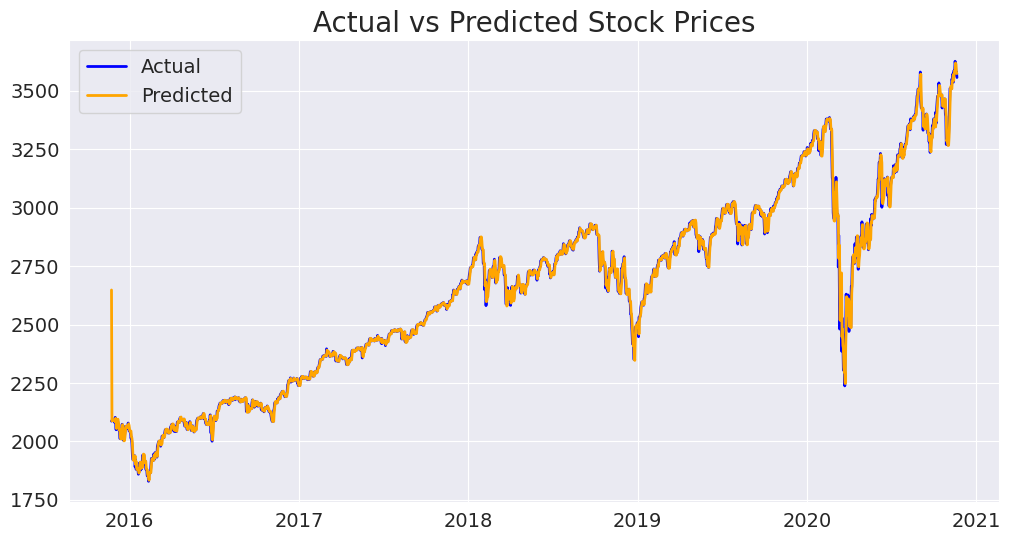

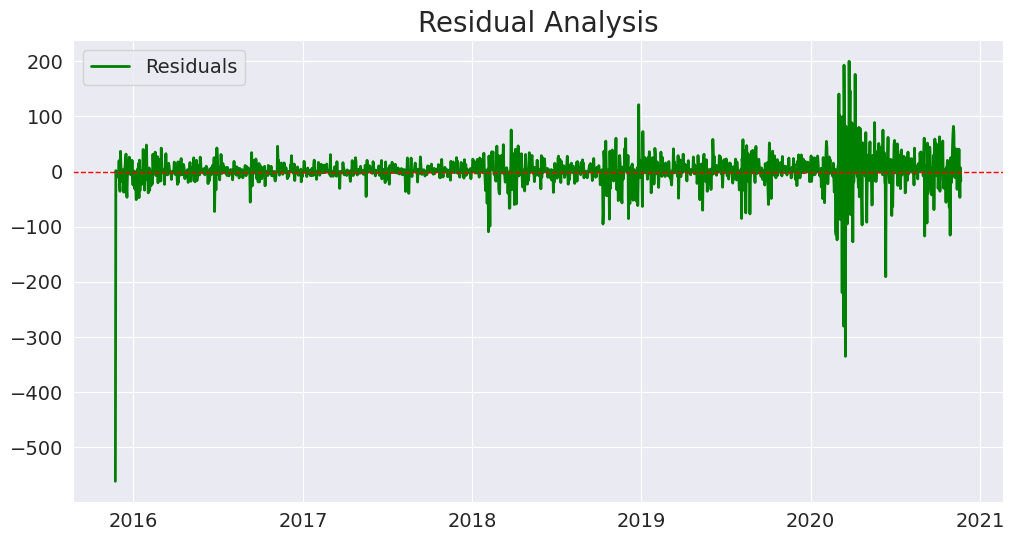

In [36]:
# Fit the final model with the best order
final_model = ARIMA(data['Close'], order=(2, 0, 2)).fit()

# Print the summary
print(final_model.summary())

# Generate in-sample predictions
predictions = final_model.predict(start=0, end=len(data)-1)

# Calculate residuals
residuals = data['Close'] - predictions

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Actual", color='blue')
plt.plot(data.index, predictions, label="Predicted", color='orange')
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(data.index, residuals, label="Residuals", color='green')
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.title("Residual Analysis")
plt.legend()
plt.show()


## SARIMAX

Training data shape:  (1460, 1)
Test data shape:  (365, 1)
Forecasting horizon: 5 days
Predicted 1/361
Predicted 101/361
Predicted 201/361
Predicted 301/361
RMSE: 56.24735348175727
R^2 Score: 0.9567197404293812
MAE: 33.8499275782539


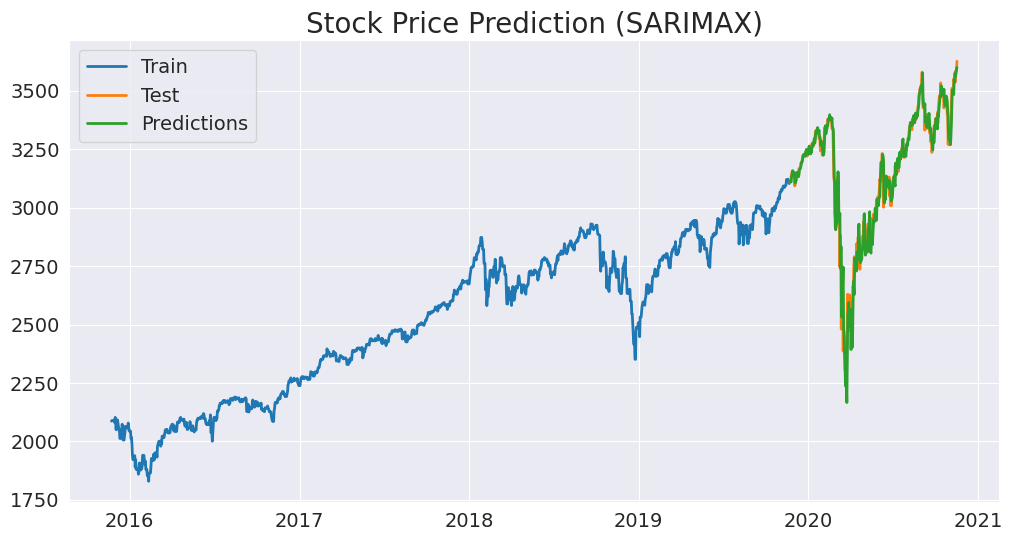

In [37]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5  # Adjust as needed
print('Forecasting horizon:', HORIZON, 'days')

# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Define the order and seasonal order for the SARIMAX model
order = (1, 1, 1)  # Perform AIC/BIC optimization to select the best parameters
seasonal_order = (1, 1, 1, 12)  # Adjust this if you have different seasonality

# Make predictions on the test data
training_window = 120  # Increased window size to capture more data
history = list(train['Close'])[-training_window:]

predictions = []
for t in range(len(test_shifted)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat[0])

    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]

    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

# Inverse transform predictions and test data
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions).flatten()
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse_s = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse_s}')
r2_s = r2_score(test_values[:len(predictions)], predictions)
print(f'R^2 Score: {r2_s}')
mae_s = mean_absolute_error(test_values[:len(predictions)], predictions)
print(f'MAE: {mae_s}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction (SARIMAX)')
plt.show()

# # Make future predictions
# future_history = list(train['Close']) + list(test['Close'])
# future_history = future_history[-training_window:]

# future_model = SARIMAX(future_history, order=order, seasonal_order=seasonal_order)
# future_model_fit = future_model.fit(disp=False)

# future_predictions = future_model_fit.forecast(steps=90)
# future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

# future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

# plt.figure(figsize=(12,6))
# plt.plot(data.index, data['Close'], label='Historical Data')
# plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
# plt.legend()
# plt.title('Stock Price Future Prediction (SARIMAX)')
# plt.show()


## ARIMA

Training data shape:  (1460, 1)
Test data shape:  (365, 1)
Forecasting horizon: 5 days
Predicted 1/361
Predicted 101/361
Predicted 201/361
Predicted 301/361
RMSE: 53.328990526475735
MAE: 31.34499924183982


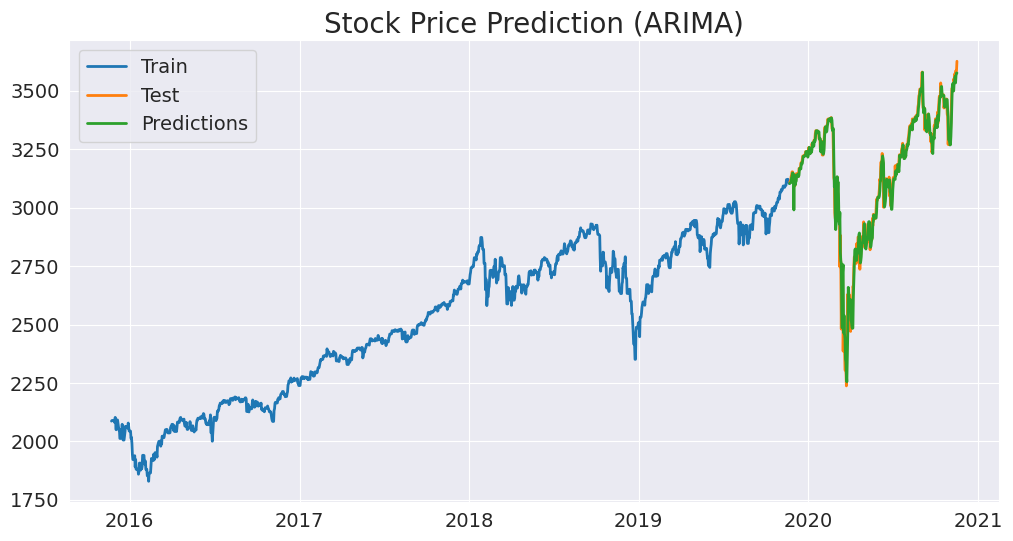

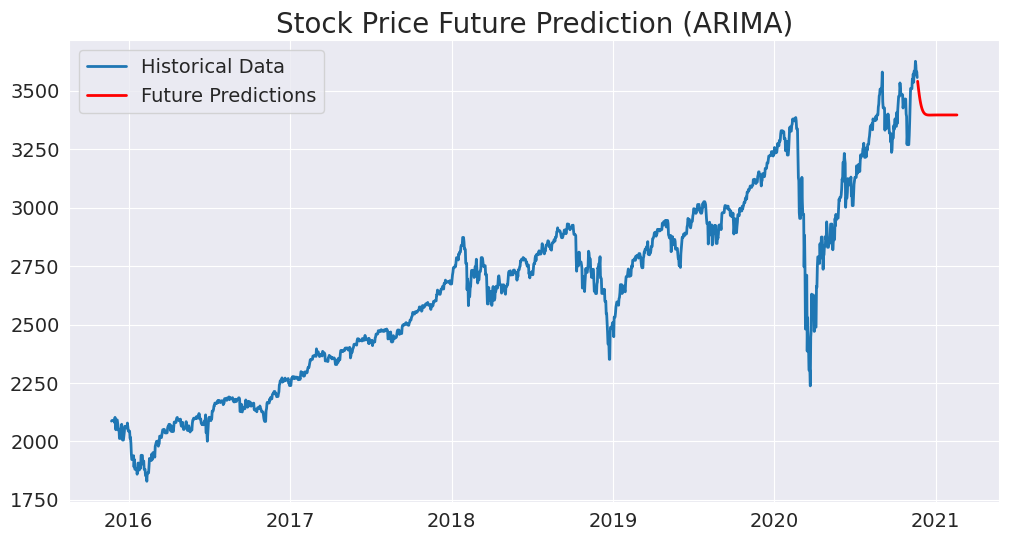

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")


# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5  # Adjust as needed
print('Forecasting horizon:', HORIZON, 'days')

# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Define the order for the ARIMA model
order = (2, 0, 2)  # Perform AIC/BIC optimization to select the best parameters

# Make predictions on the test data
training_window = 120  # Increased window size to capture more data
history = list(train['Close'])[-training_window:]

predictions = []
for t in range(len(test_shifted)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()

    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat[0])

    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]

    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

# Inverse transform predictions and test data
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions).flatten()
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse2}')
mae = mean_absolute_error(test_values[:len(predictions)], predictions)
print(f'MAE: {mae}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction (ARIMA)')
plt.show()

# Make future predictions
future_history = list(train['Close']) + list(test['Close'])
future_history = future_history[-training_window:]

future_model = ARIMA(future_history, order=order)
future_model_fit = future_model.fit()

future_predictions = future_model_fit.forecast(steps=90)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction (ARIMA)')
plt.show()


## Deep Learning

In [39]:
a.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.61,2081.39,2089.41,2086.59,3587980000.00,2086.59
2015-11-24,2094.12,2070.29,2084.42,2089.14,3884930000.00,2089.14
2015-11-25,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-26,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-27,2093.29,2084.13,2088.82,2090.11,1466840000.00,2090.11


In [40]:
data=a


In [41]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.61,2081.39,2089.41,2086.59,3587980000.00,2086.59
2015-11-24,2094.12,2070.29,2084.42,2089.14,3884930000.00,2089.14
2015-11-25,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-26,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-27,2093.29,2084.13,2088.82,2090.11,1466840000.00,2090.11


In [42]:
data.reset_index(inplace=True)


In [43]:
data.columns


Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB


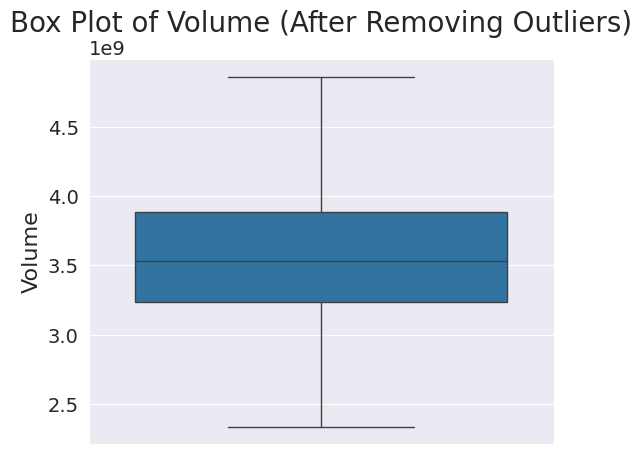

Cross-validation scores: [0.0006153040449135005, 0.000566457980312407, 0.0010303989984095097, 0.0006174682639539242, 0.003170081414282322]
Mean CV score: 0.0011999421403743327
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Root Mean Squared Error: 55.12284340638249
Mean Absolute Error: 35.67913838423529
R-squared Score: 0.9806195993568438


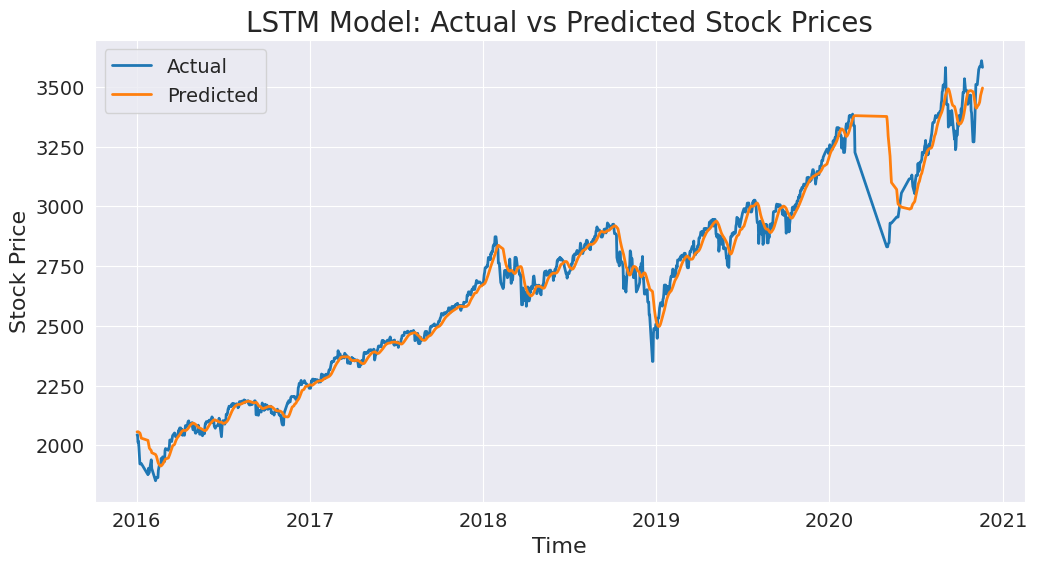

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    while True:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        if len(df_filtered) == len(df):
            break

        df = df_filtered

    return df

# Load the dataset

data = data.sort_values("Date").set_index("Date")

# Remove outliers from the Volume column
data_cleaned = remove_outliers_iqr(data, "Volume")

# Plot box plot after removing outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=data_cleaned["Volume"], flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title("Box Plot of Volume (After Removing Outliers)")
plt.ylabel("Volume")
plt.show()

# Use only Close prices for prediction
close_prices = data_cleaned["Close"]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=5)

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_data=(X_val, y_val),
              callbacks=[early_stopping, lr_reducer], verbose=0)

    score = model.evaluate(X_val, y_val, verbose=0)
    cv_scores.append(score)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Inverse transform the predictions and actual values
y_pred_orig = scaler.inverse_transform(y_pred)
y_orig = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate metrics
rmse3 = np.sqrt(mean_squared_error(y_orig, y_pred_orig))
mae3= mean_absolute_error(y_orig, y_pred_orig)
r23= r2_score(y_orig, y_pred_orig)

print(f"Root Mean Squared Error: {rmse3}")
print(f"Mean Absolute Error: {mae3}")
print(f"R-squared Score: {r23}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index[seq_length:], y_orig, label='Actual')
plt.plot(close_prices.index[seq_length:], y_pred_orig, label='Predicted')
plt.legend()
plt.title('LSTM Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()


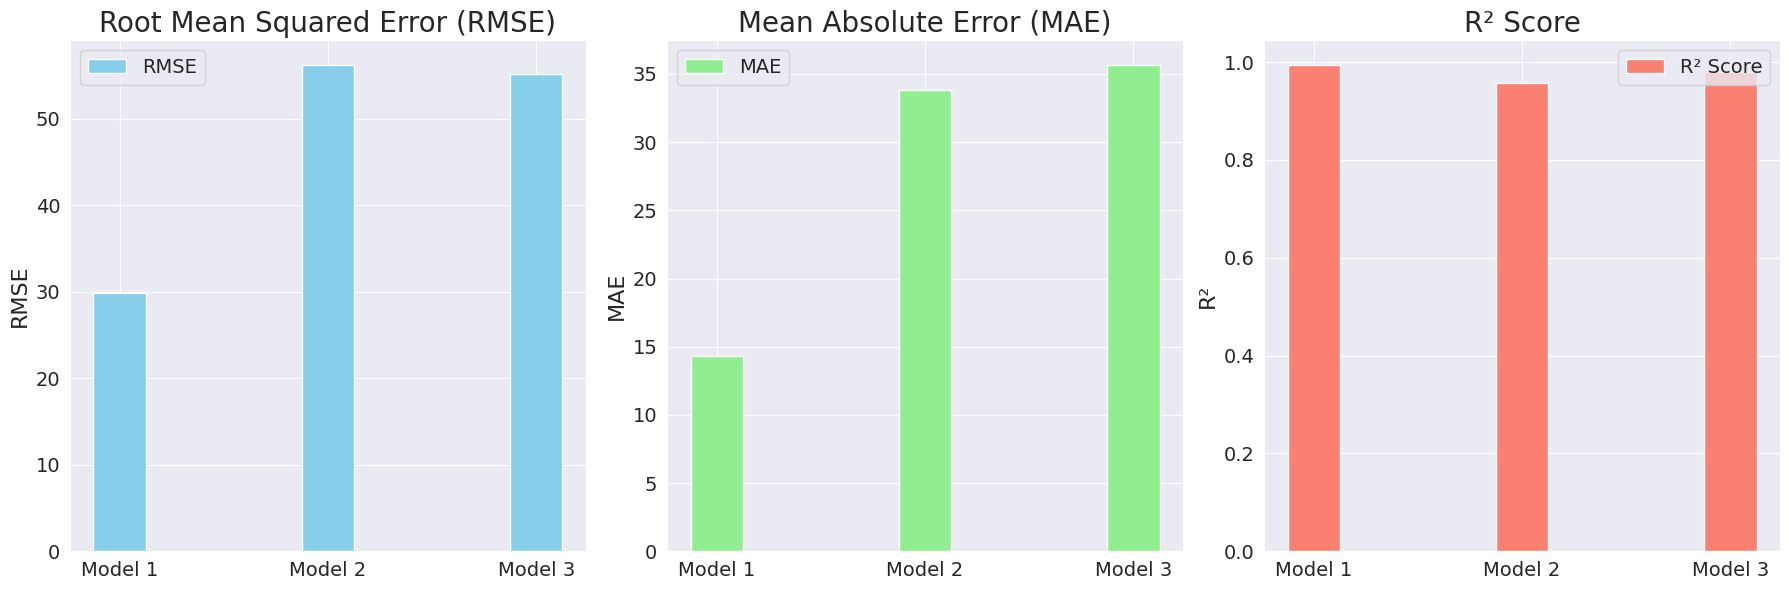

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual values
model_names = ['Model 1', 'Model 2', 'Model 3']
rmse_values = [best_rmse, rmse_s, rmse3]
mae_values = [best_mae, mae_s, mae3]
r2_values = [best_r2, r2_s, r23]

# Create subplots for RMSE, MAE, and R²
x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot RMSE
ax[0].bar(x, rmse_values, width, color='skyblue', label='RMSE')
ax[0].set_title('Root Mean Squared Error (RMSE)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].set_ylabel('RMSE')
ax[0].legend()

# Plot MAE
ax[1].bar(x, mae_values, width, color='lightgreen', label='MAE')
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].set_ylabel('MAE')
ax[1].legend()

# Plot R²
ax[2].bar(x, r2_values, width, color='salmon', label='R² Score')
ax[2].set_title('R² Score')
ax[2].set_xticks(x)
ax[2].set_xticklabels(model_names)
ax[2].set_ylabel('R²')
ax[2].legend()

plt.tight_layout()
plt.show()


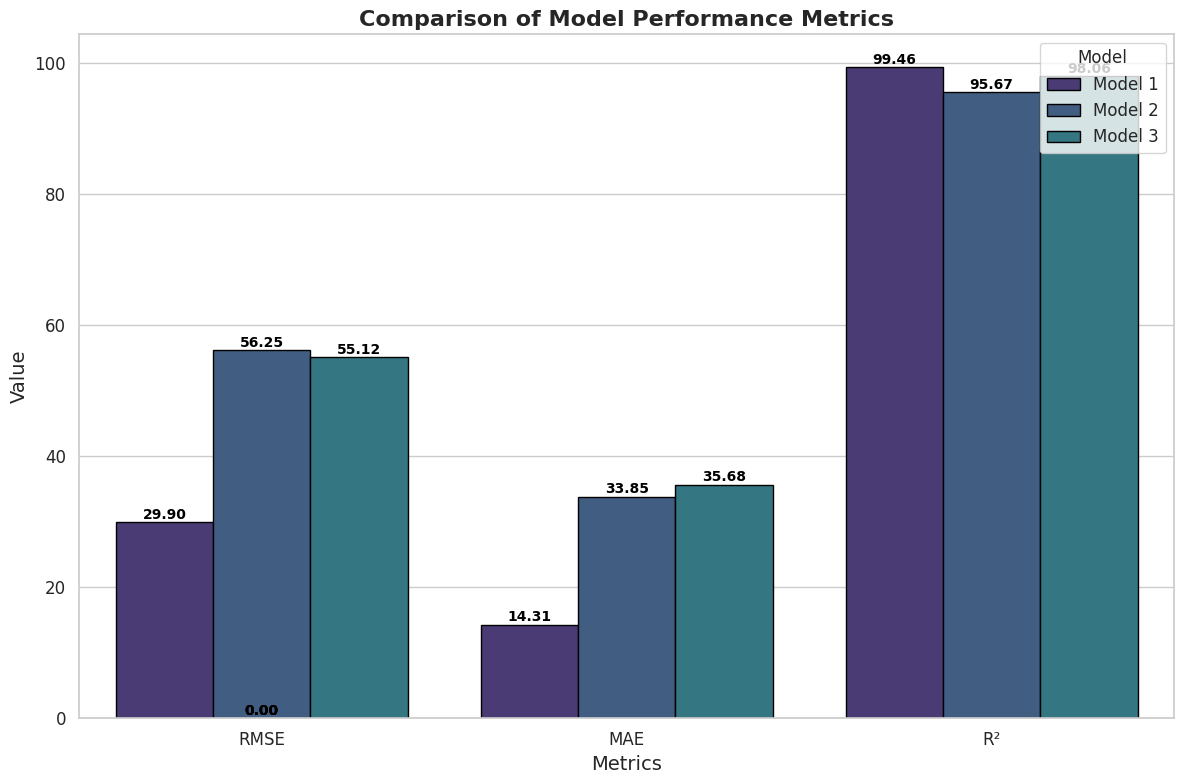

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace these with your actual values
data = {
    'Metric': ['RMSE', 'RMSE', 'RMSE', 'MAE', 'MAE', 'MAE', 'R²', 'R²', 'R²'],
    'Model': ['Model 1', 'Model 2', 'Model 3'] * 3,
    'Value': [best_rmse, rmse_s, rmse3, best_mae, mae_s, mae3, best_r2*100, r2_s*100, r23*100]
}

# Convert the data into a DataFrame for visualization
df = pd.DataFrame(data)

# Set the style
sns.set_theme(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette("viridis", as_cmap=False)

# Plot the metrics comparison
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Metric",
    y="Value",
    hue="Model",
    data=df,
    palette=palette,
    dodge=True,
    edgecolor="black",
    linewidth=1
)

# Add a title, labels, and legend
plt.title("Comparison of Model Performance Metrics", fontsize=16, fontweight="bold")
plt.ylabel("Value", fontsize=14)
plt.xlabel("Metrics", fontsize=14)
plt.legend(title="Model", fontsize=12, title_fontsize=12, loc="upper right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate values on bars
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        fontweight="bold"
    )

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
from statsmodels.stats.weightstats import ztest

# Example data: RMSE values from two models
rmse_model1 = [best_rmse, rmse_s, rmse3]
rmse_model2 = [best_rmse + 0.5, rmse_s - 0.3, rmse3 + 0.2]

# Perform Z-test
z_stat, p_value = ztest(rmse_model1, rmse_model2, value=0)
print(f"Z-Test Results:\nZ-Statistic: {z_stat:.2f}, P-value: {p_value:.4f}")


Z-Test Results:
Z-Statistic: -0.01, P-value: 0.9912


In [51]:
from scipy.stats import ttest_ind

# Example data: RMSE values for two models
rmse_model1 = [best_rmse, rmse_s, rmse3]
rmse_model2 = [best_rmse + 0.5, rmse_s - 0.3, rmse3 + 0.2]

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(rmse_model1, rmse_model2)
print(f"Two-Sample T-Test Results:\nT-Statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


Two-Sample T-Test Results:
T-Statistic: -0.01, P-value: 0.9917


In [52]:
from scipy.stats import f_oneway

# Example data: RMSE values for three models
rmse_model1 = [best_rmse, rmse_s, rmse3]
rmse_model2 = [best_rmse + 0.5, rmse_s - 0.3, rmse3 + 0.2]
rmse_model3 = [best_rmse + 1.0, rmse_s - 0.5, rmse3 + 0.4]

# Perform ANOVA Test
f_stat, p_value = f_oneway(rmse_model1, rmse_model2, rmse_model3)
print(f"ANOVA Test Results:\nF-Statistic: {f_stat:.2f}, P-value: {p_value:.4f}")


ANOVA Test Results:
F-Statistic: 0.00, P-value: 0.9997


Overall Interpretation
Across all three tests:

No statistically significant differences were found between the groups being compared (whether two groups or three groups).

The results strongly suggest that the performance metrics (e.g., RMSE, MAE,
𝑅
2
R
2
 ) of the models are essentially the same, with differences likely due to random variation.